In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rcParams["figure.dpi"] = 400
mpl.rcParams["figure.figsize"] = [6.4, 4.8]
import seaborn as sns


In [2]:
np.random.seed(seed = 9)
n_points = 20
X = np.random.uniform(0, 11, n_points)
X = np.sort(X)
Y = (-X + 2) * (X-9) + np.random.normal(0, 3, n_points)

In [3]:
lin_fit = np.polyfit(X, Y, 1)

In [4]:
def poly_fun(X, p):
    Y = np.zeros_like(X)
    power = len(p)-1
    for coefficient in p:
        Y = Y + coefficient*X**power
        power = power - 1
    return Y

In [5]:
lin_fit

array([ 0.44464616, -0.61869372])

In [6]:
poly_fun(X,lin_fit)

array([-0.56795261, -0.42917123, -0.2075489 ,  0.03588094,  0.07638692,
        0.19702737,  0.45030033,  0.59479584,  1.07117738,  1.42827491,
        1.80618691,  1.83602902,  2.06083994,  2.18273629,  2.64318106,
        2.8007159 ,  2.81695454,  3.67843349,  3.77355591,  4.03257388])

In [7]:
curve_x = np.linspace(0,11,333)

In [8]:
cmap = mpl.colormaps['tab10']

In [9]:
X_poly = np.linspace(-3,5,81)
print(X_poly[:5], '...', X_poly[-5:])

[-3.  -2.9 -2.8 -2.7 -2.6] ... [4.6 4.7 4.8 4.9 5. ]


In [10]:
def cost_function(X):
    return X * (X-2)

y_poly = cost_function(X_poly)

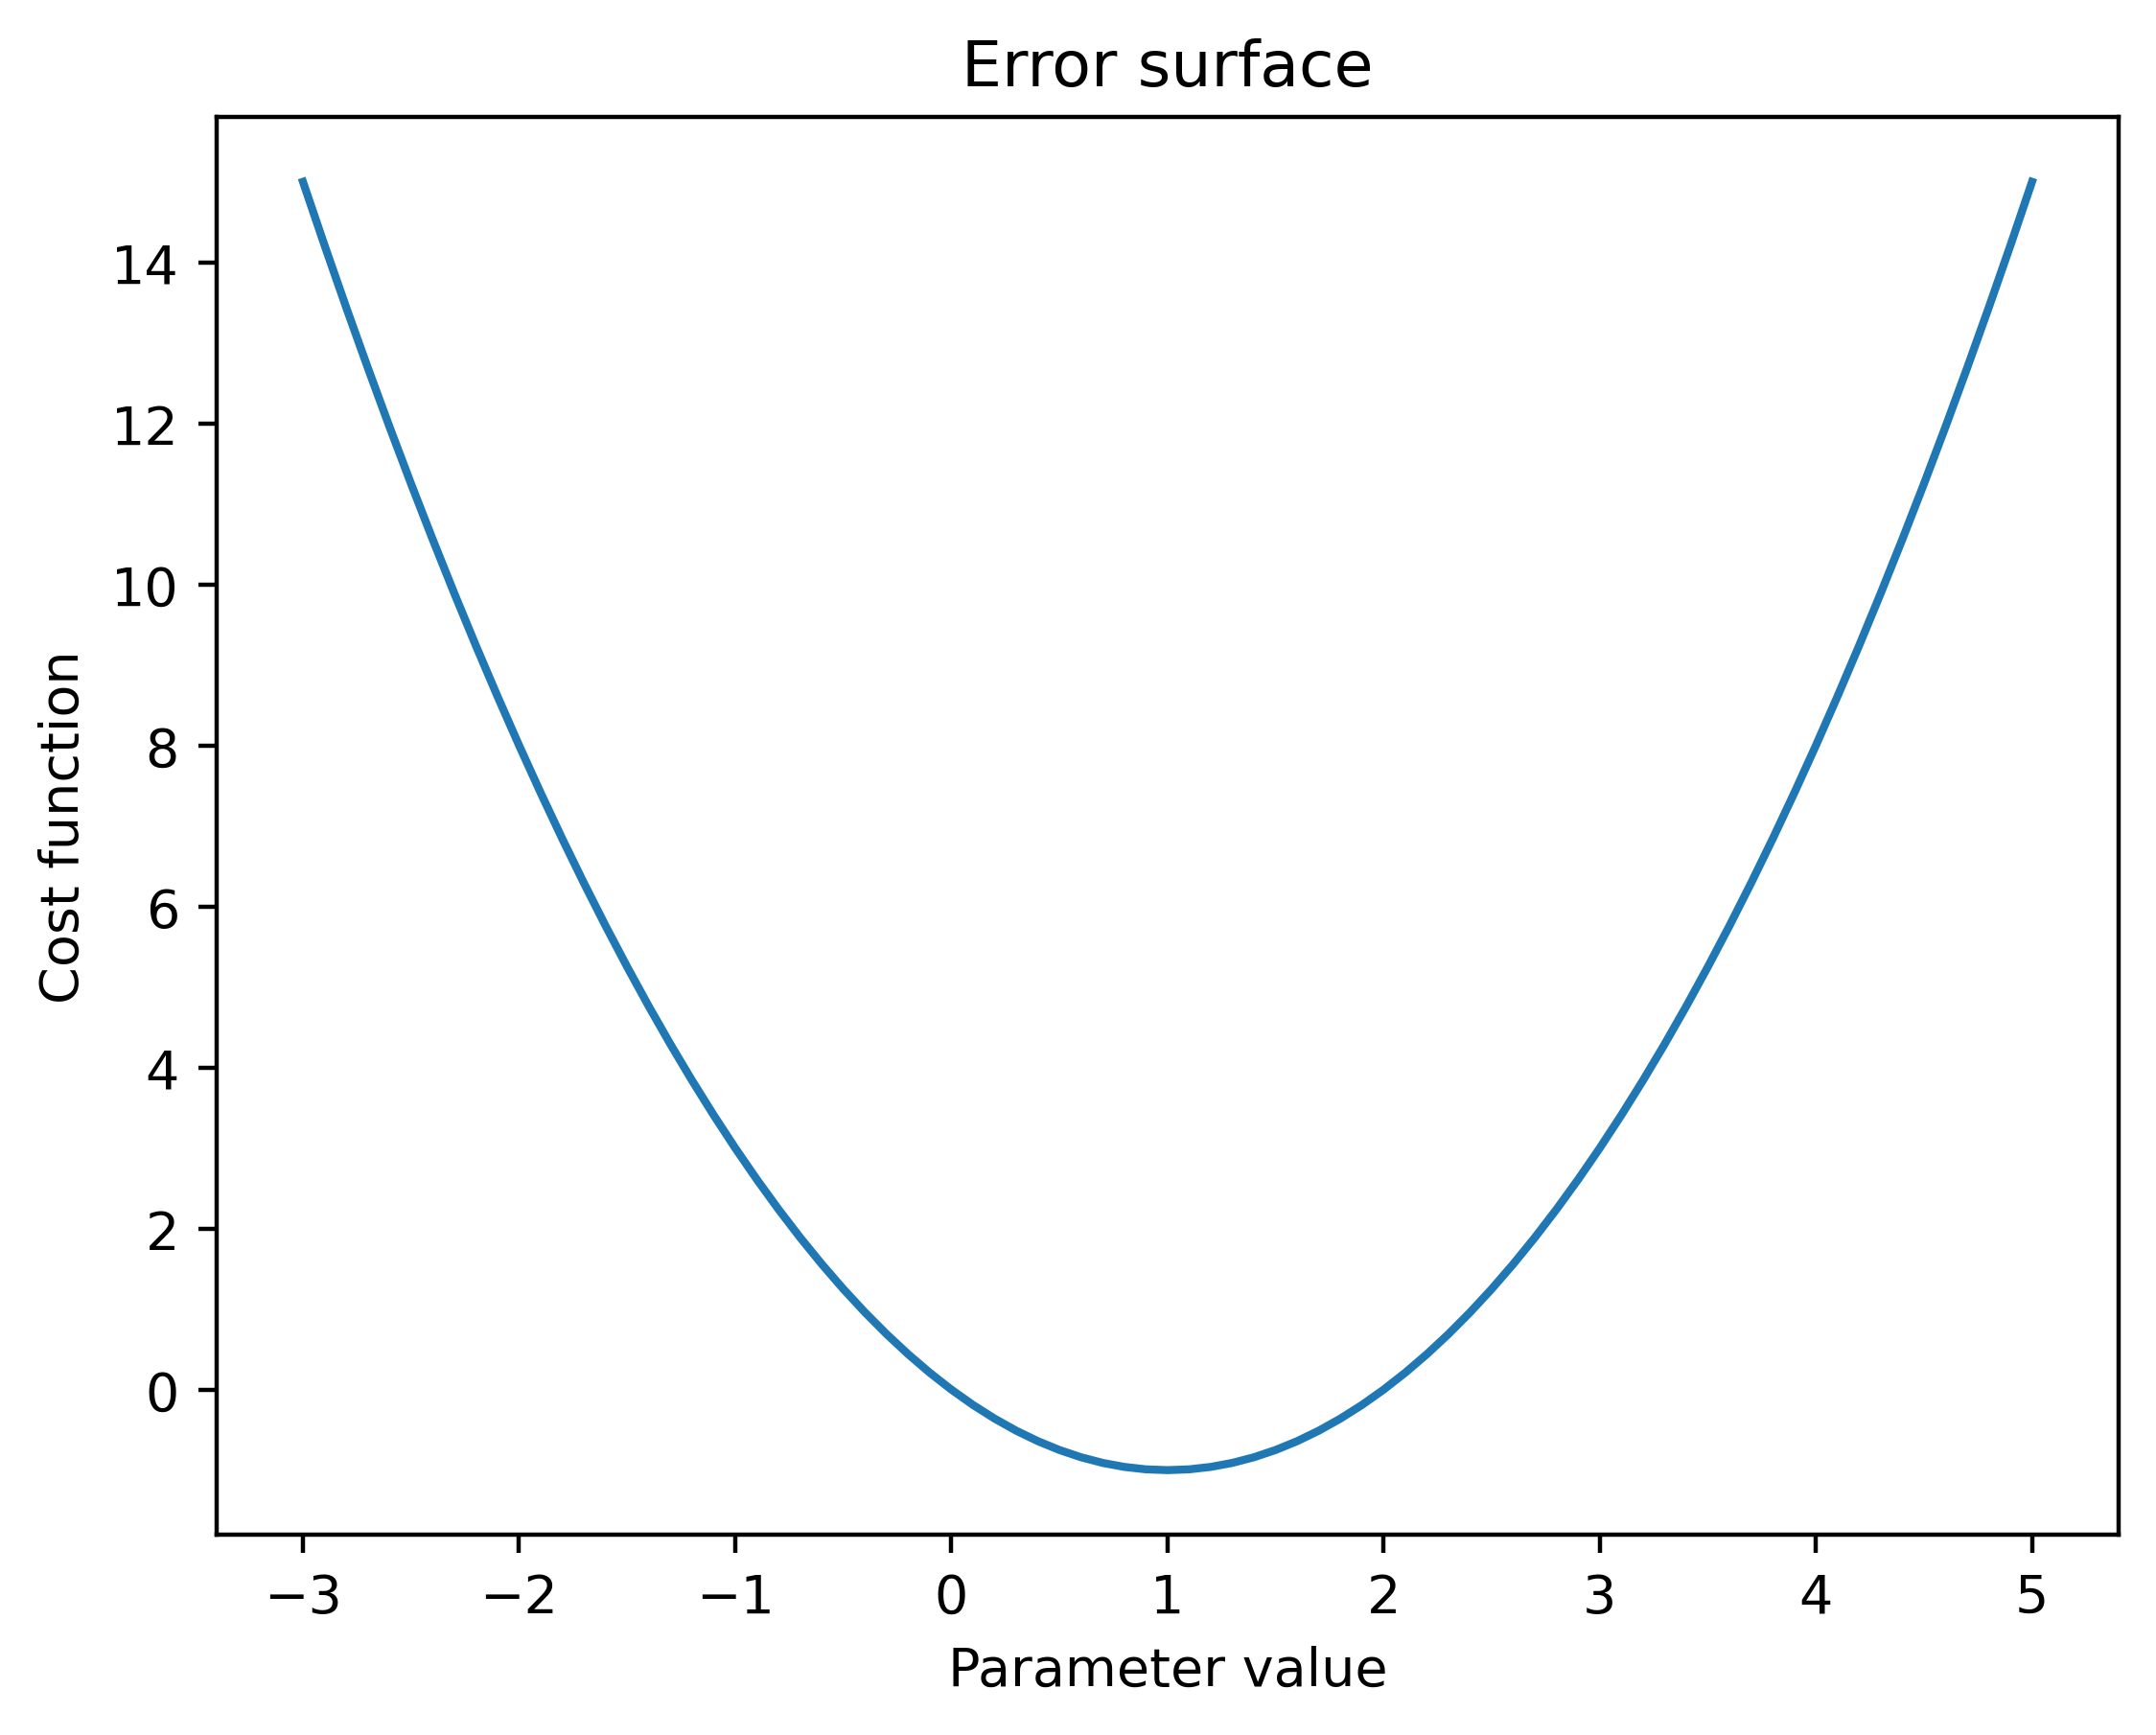

In [11]:
plt.plot(X_poly, y_poly)
plt.xlabel('Parameter value')
plt.ylabel('Cost function')
plt.title('Error surface')
plt.show()

In [12]:
def gradient(X):
    return (2 * X) - 2

x_start = 4.5
learning_rate = 0.75

In [13]:
x_next = x_start - gradient(x_start) * learning_rate
x_next

-0.75

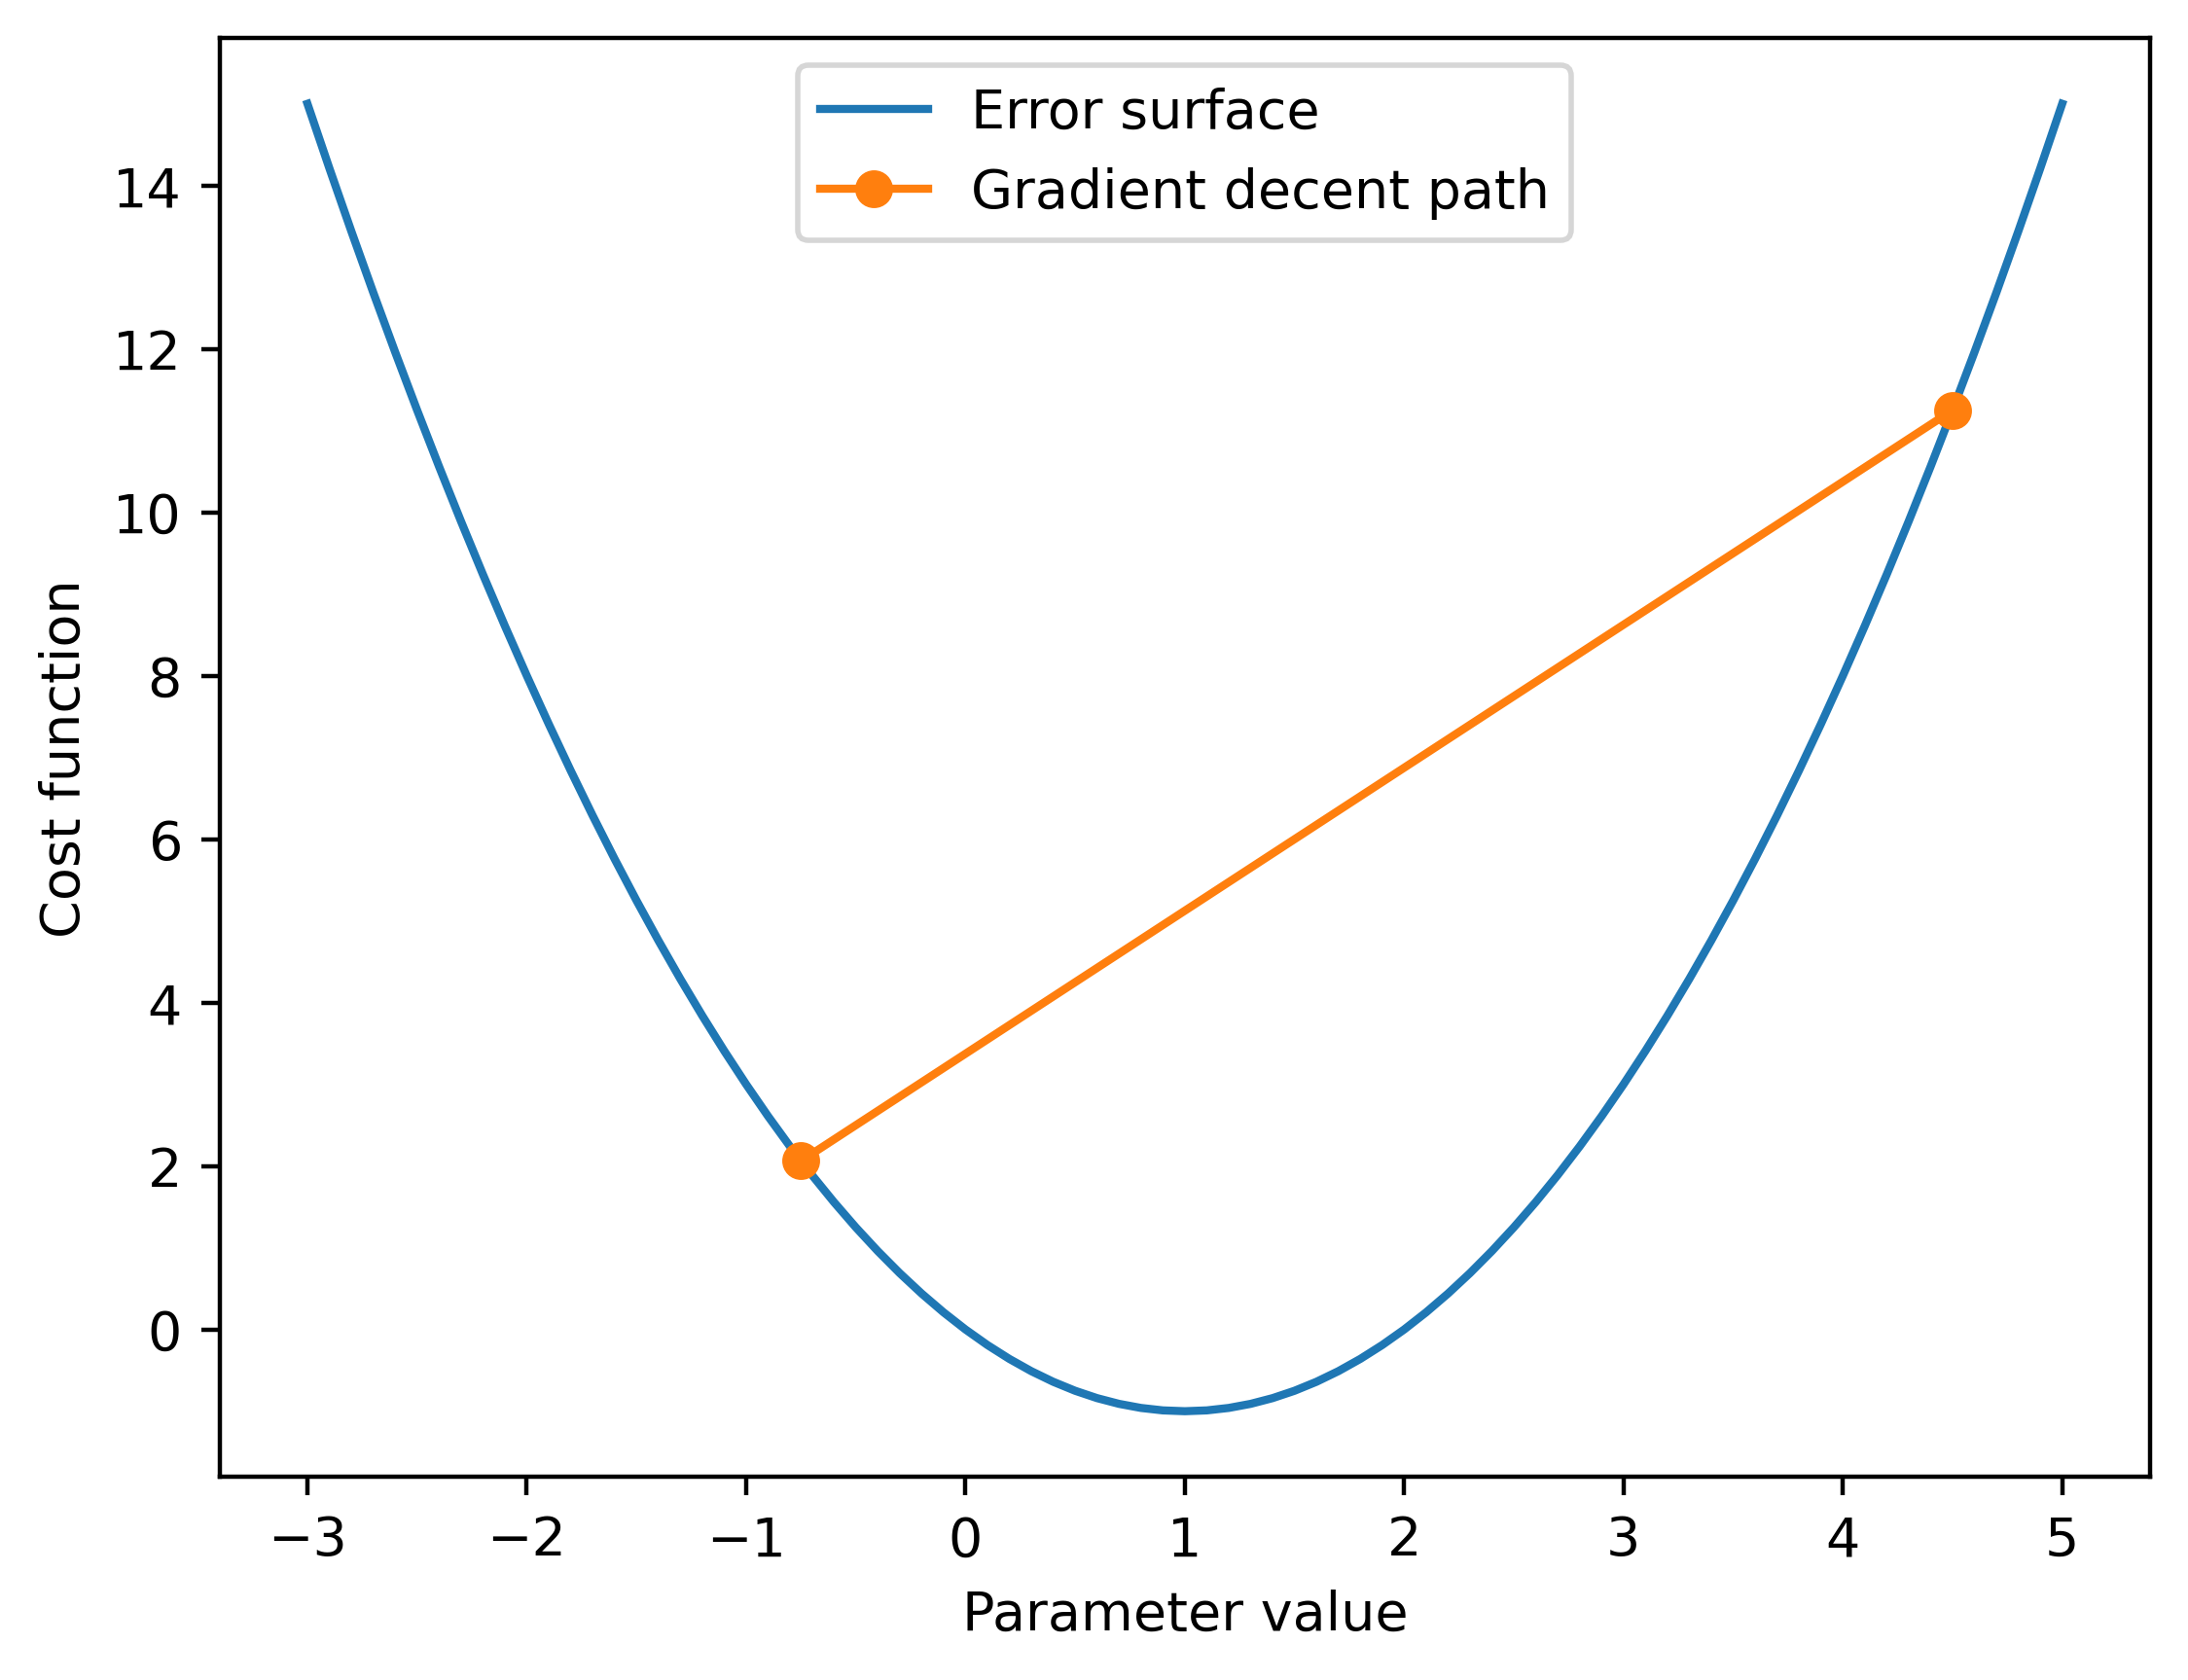

In [14]:
plt.plot(X_poly, y_poly)
plt.plot([x_start, x_next], [cost_function(x_start), cost_function(x_next)], '-o')
plt.xlabel('Parameter value')
plt.ylabel('Cost function')
plt.legend(['Error surface', 'Gradient decent path'])
plt.show()

In [15]:
iterations = 15
x_path = np.empty(iterations)
x_path[0] = x_start

In [16]:
for iteration_count in range(1, iterations):
    derivative = gradient(x_path[iteration_count - 1])
    x_path[iteration_count] = x_path[iteration_count - 1] - (derivative * learning_rate)

In [17]:
x_path

array([ 4.5       , -0.75      ,  1.875     ,  0.5625    ,  1.21875   ,
        0.890625  ,  1.0546875 ,  0.97265625,  1.01367188,  0.99316406,
        1.00341797,  0.99829102,  1.00085449,  0.99957275,  1.00021362])

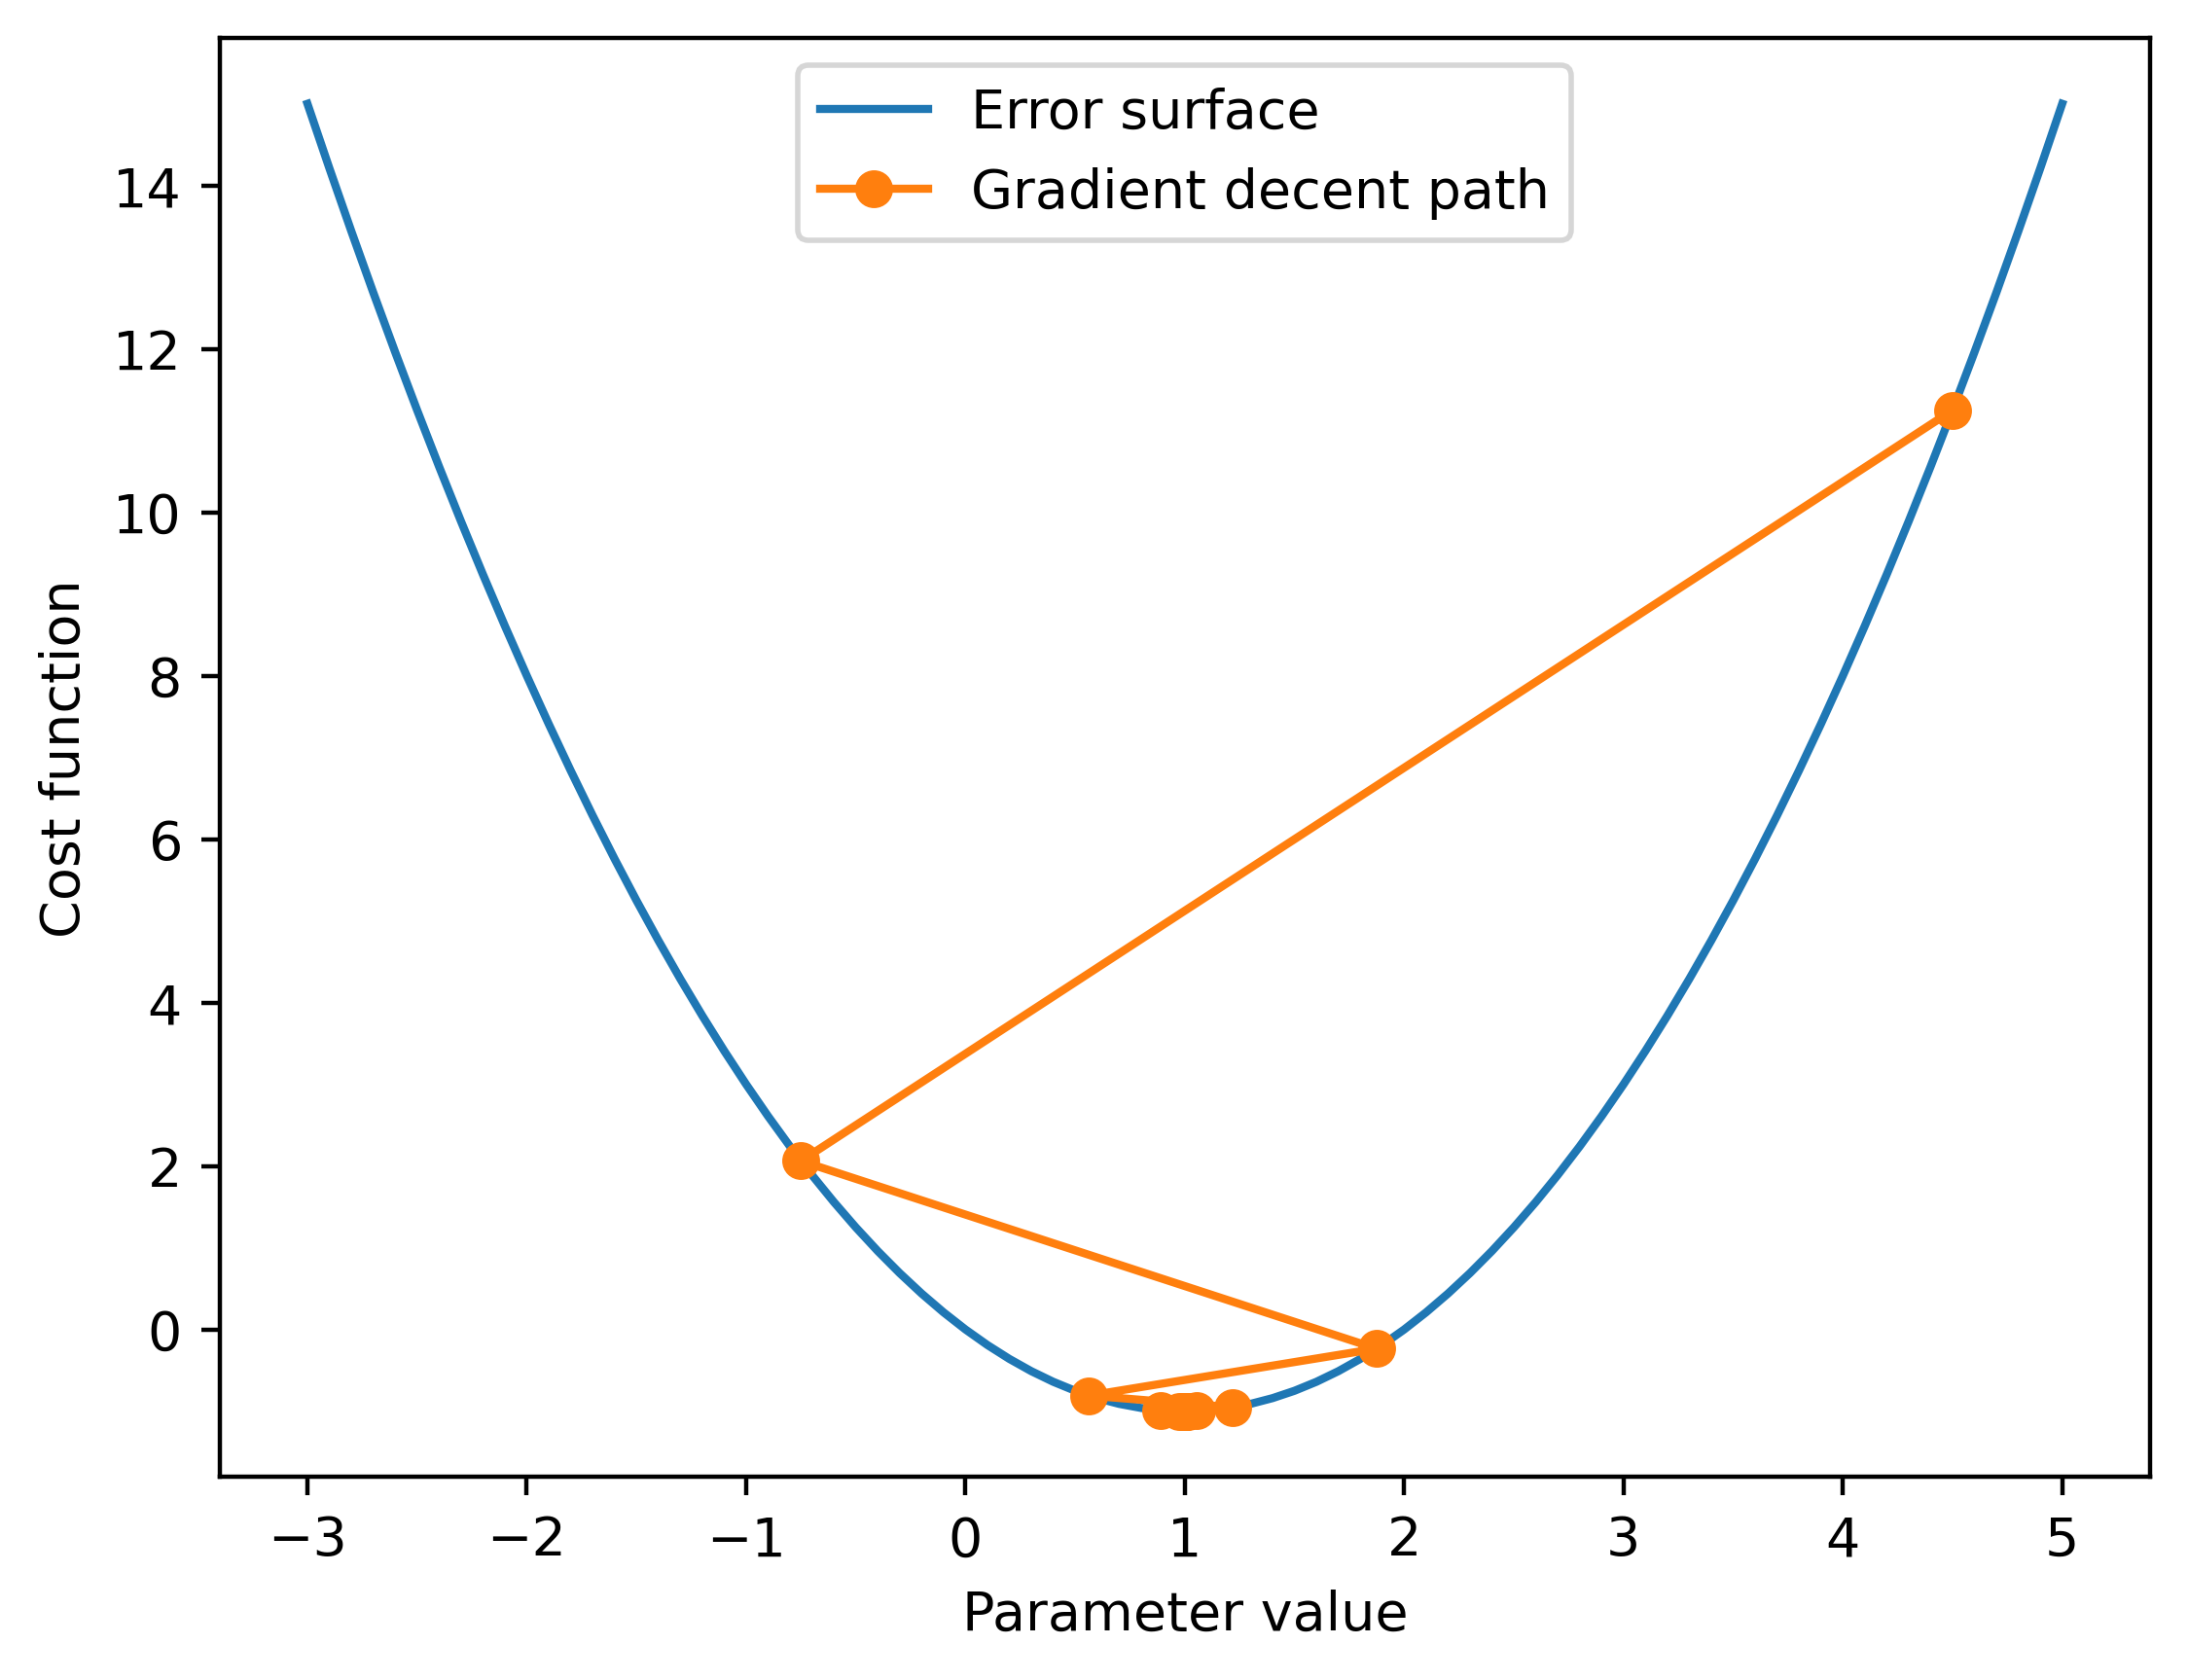

In [18]:
plt.plot(X_poly, y_poly)
plt.plot(x_path, cost_function(x_path), '-o')
plt.xlabel('Parameter value')
plt.ylabel('Cost function')
plt.legend(['Error surface', 'Gradient decent path'])
plt.show()

### Plot for Overfit, Underfit and Ideal models 

#### Generating and Modeling Synthetic Classification Data

In [19]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score 

In [20]:
# Generate synthetic dataset with two variables
X_synthetic, y_synthetic = make_classification(
    n_samples = 1000, n_features = 200, n_informative = 3,
      n_redundant = 10, n_repeated = 0, n_classes = 2,
        n_clusters_per_class = 2, weights = None, flip_y = 0.01,
          class_sep = 0.8, hypercube = True, shift = 0.0, scale = 1.0,
            shuffle = True, random_state = 24
            )

In [21]:
# Shape of the dataset and class fraction of response variable
print(X_synthetic.shape, y_synthetic.shape)
print(np.mean(y_synthetic))

(1000, 200) (1000,)
0.501


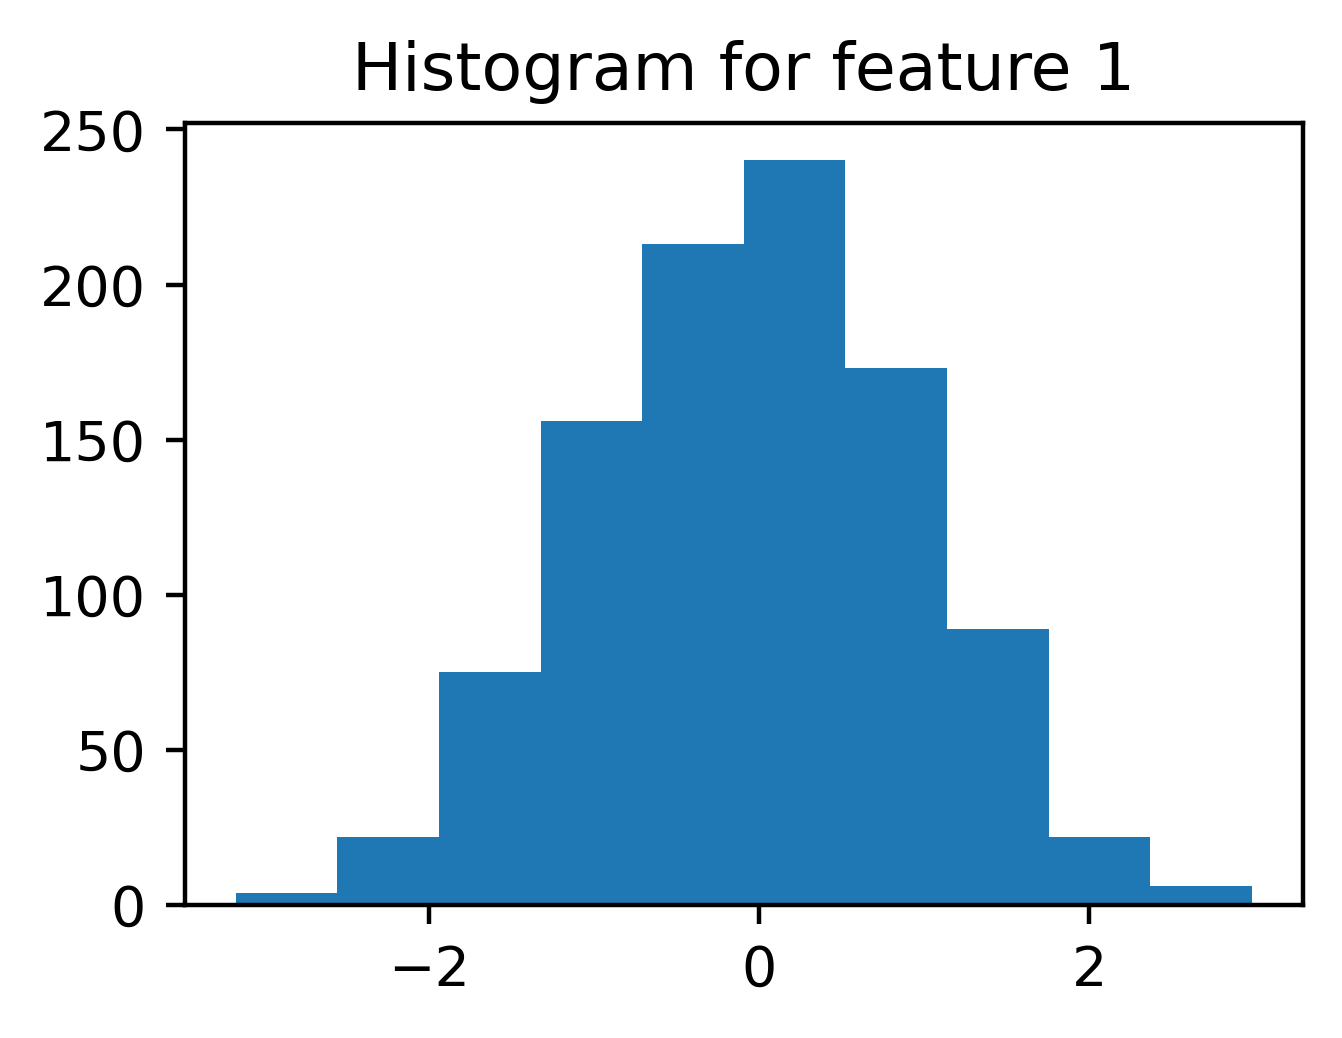

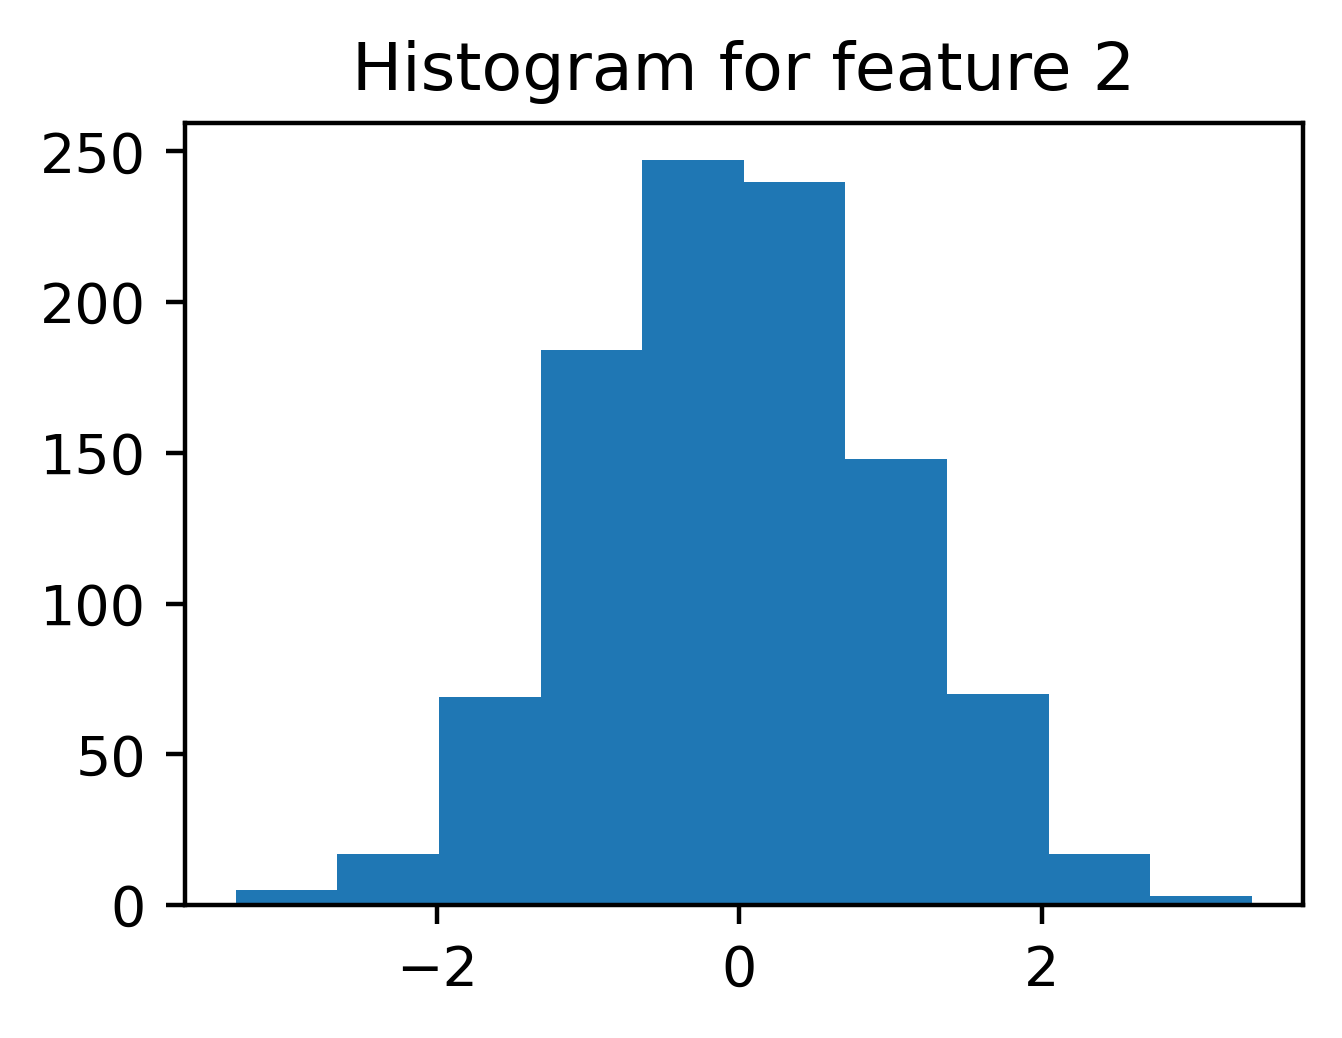

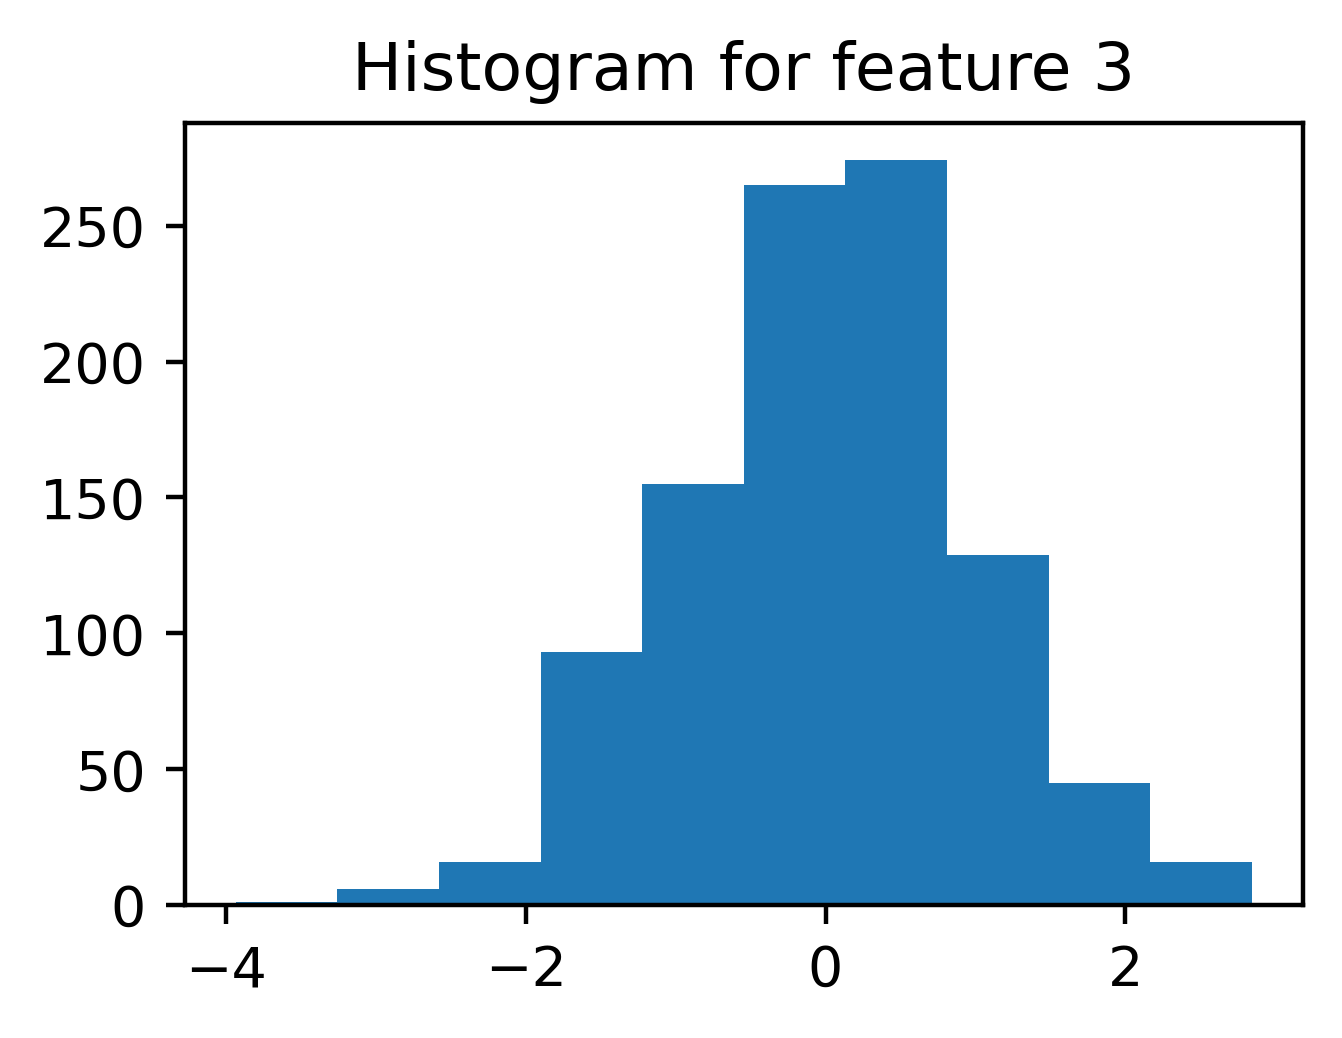

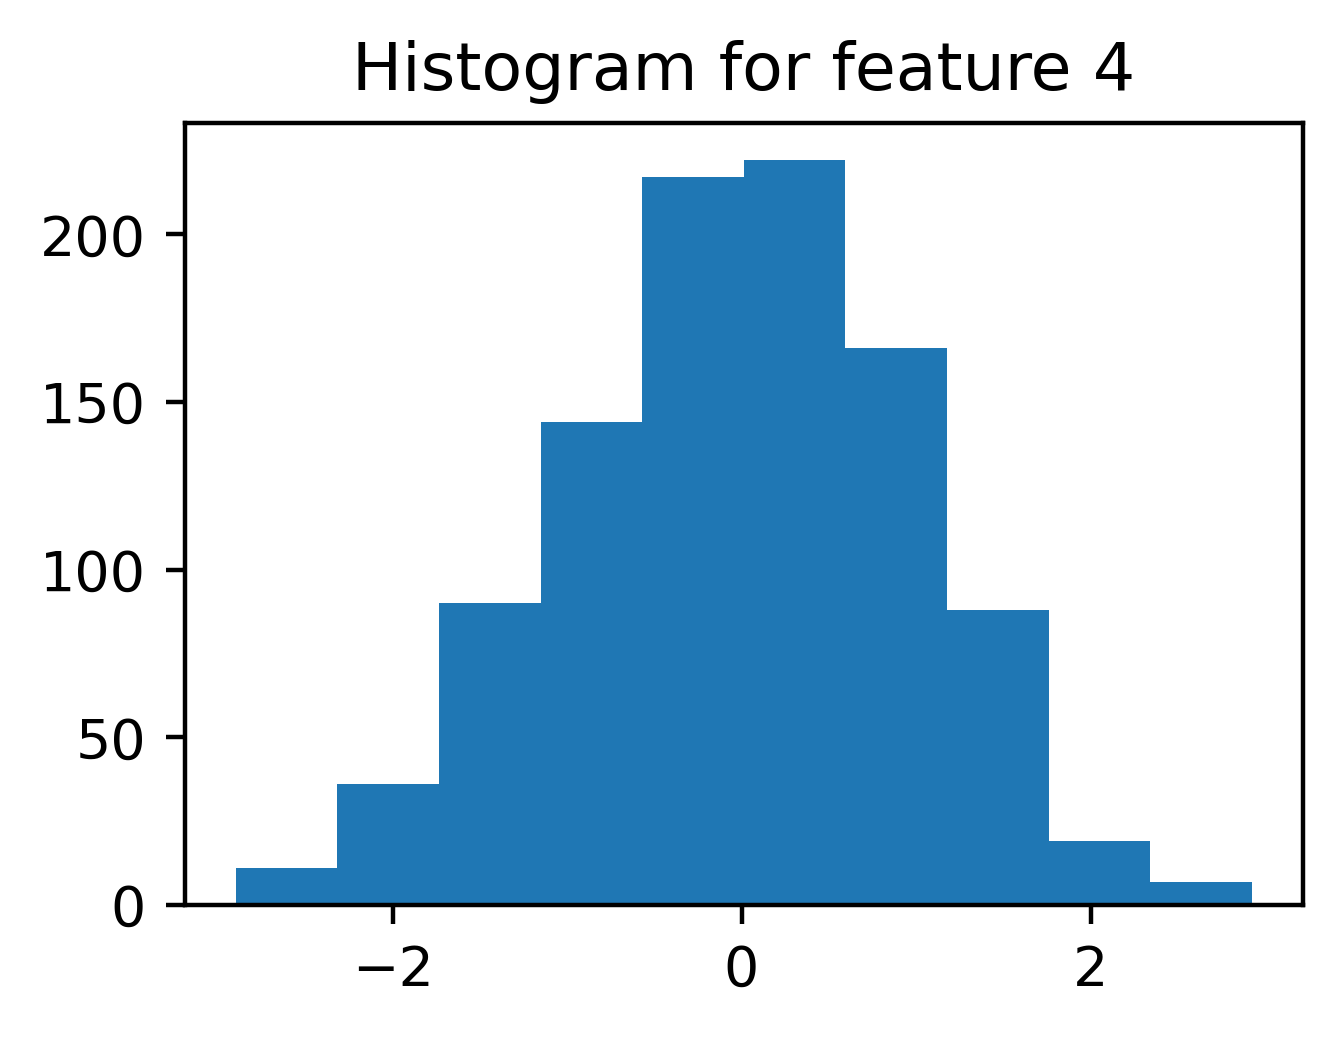

In [22]:
for plot_index in range(4):
    plt.subplot(2, 2, plot_index + 1)
    plt.hist(X_synthetic[:, plot_index])
    plt.title('Histogram for feature {}'.format(plot_index + 1))
    plt.tight_layout()
    plt.show()


In [23]:
# Spliting the data into training and testing sets
X_syn_train, X_syn_test, y_syn_train, y_syn_test = train_test_split(
    X_synthetic, y_synthetic, test_size = 0.2, random_state = 24
    )

In [24]:
lr_syn = LogisticRegression(solver ='liblinear', penalty ='l1', C = 1000, random_state = 1)
lr_syn.fit(X_syn_train, y_syn_train)

LogisticRegression(C=1000, penalty='l1', random_state=1, solver='liblinear')

In [25]:
poly_features = X.reshape(20,-1)
plot_features = curve_x.reshape(333,-1)
for power in range (2,16):
    power_array = X.reshape(20,-1)** power
    poly_features = np.append(poly_features, power_array.reshape(20,-1), axis = 1)
    plot_power_array = curve_x.reshape(333,-1)**power
    plot_features = np.append(plot_features, plot_power_array.reshape(333,-1), axis = 1)

In [26]:
from sklearn.linear_model import Ridge

In [27]:
regressor = Ridge(alpha = 0.001, fit_intercept = True,
                        copy_X = True, max_iter = None, tol = 0.001,
                        random_state = 1)

In [28]:
regressor.fit(poly_features, Y)
Y_pred = regressor.predict(plot_features)

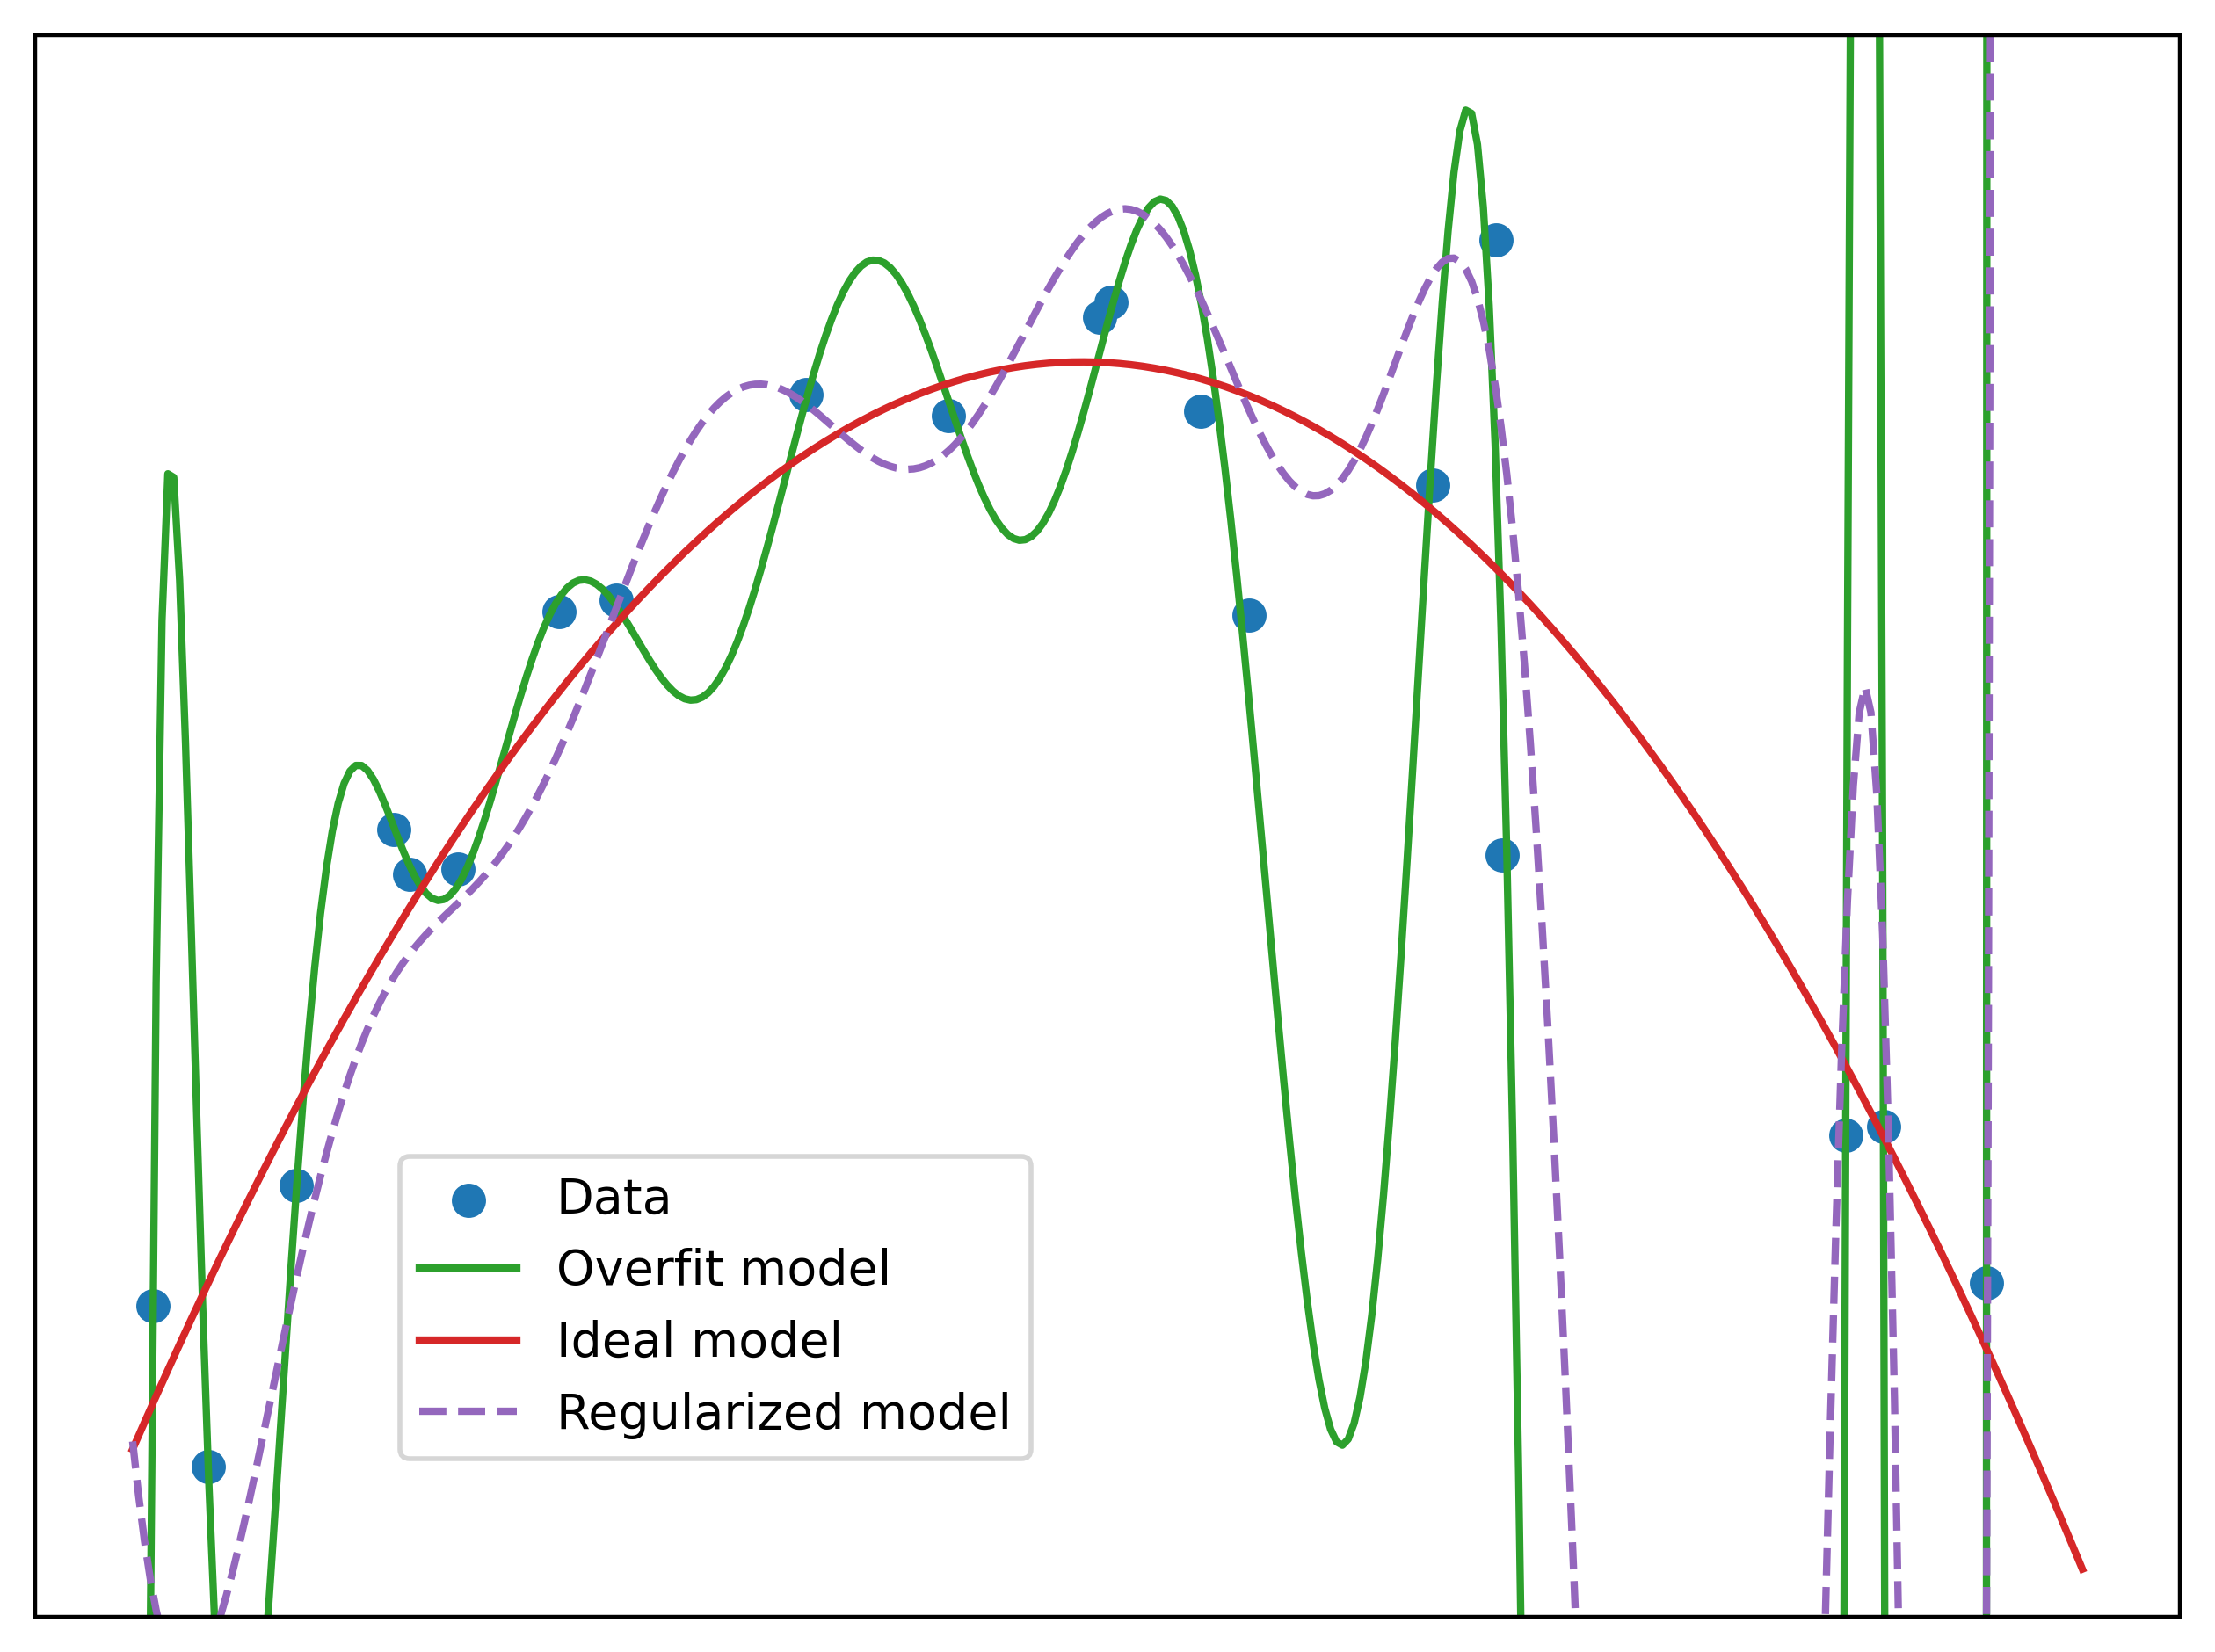

In [29]:
plt.scatter(X, Y, label ='Data', color = cmap(0))
plt.plot(curve_x, poly_fun(curve_x,np.polyfit(X, Y, 15)), label ='Overfit model', color = cmap(2))
plt.plot(curve_x, poly_fun(curve_x,np.polyfit(X, Y, 2)), label = 'Ideal model', color = cmap(3))
plt.plot(curve_x, Y_pred, label='Regularized model', color = cmap(4), linestyle ='--')
plt.legend(loc = [0.17, 0.1])
plt.xticks([])
plt.yticks([])
plt.ylim([-20, 20])
plt.tight_layout()
plt.show()


In [30]:
y_syn_train_predict_prob = lr_syn.predict_proba(X_syn_train)
roc_auc_score(y_syn_train, y_syn_train_predict_prob[:,1])

0.9420000000000001

In [31]:
y_syn_test_predict_proba = lr_syn.predict_proba(X_syn_test)
roc_auc_score(y_syn_test, y_syn_test_predict_proba[:,1])

0.8075807580758075

### Cross Validation

In [32]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

In [33]:
n_folds = 4
k_folds = KFold(n_splits = n_folds, shuffle = False)

In [34]:
def plot_kfolds(k_folds_iterator):
    fold_counter = 0
    for train_index, test_index in k_folds_iterator.split(X_syn_train,
                                                          y_syn_train):

        #Axis to hold the plot of this fold
        ax = plt.subplot(n_folds,1,fold_counter + 1)

        #Background rectangle representing all samples
        n_train_samples = len(y_syn_train)
        rect = mpl.patches.Rectangle(xy = (0,0), width = n_train_samples, height = 1)
        ax.add_patch(rect)

        #Plot each testing sample from this fold as a vertical line
        for this_text_ix in test_index:
            ax.plot([this_text_ix, this_text_ix], [0, 1], color = cmap(1),
                    linewidth = 0.75)

        #Plot formatting
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xlim(0, n_train_samples)
        ax.set_ylim(0,1)
        
        #Subplot titles
        if fold_counter == 0:
            ax.text(0.26, 1.2, 'Training data,',
                    transform = ax.transAxes, backgroundcolor = cmap(0))
            ax.text(0.45, 1.2, 'testing data:',
                    transform = ax.transAxes, backgroundcolor = cmap(1))
            ax.text(0.62, 1.2, 'fold {}'.format(fold_counter + 1), transform = ax.transAxes)
        else:
            ax.text(0.45, 1.2, 'Fold {}'.format(fold_counter + 1), transform = ax.transAxes)

        fold_counter += 1

    plt.tight_layout()
    plt.show()

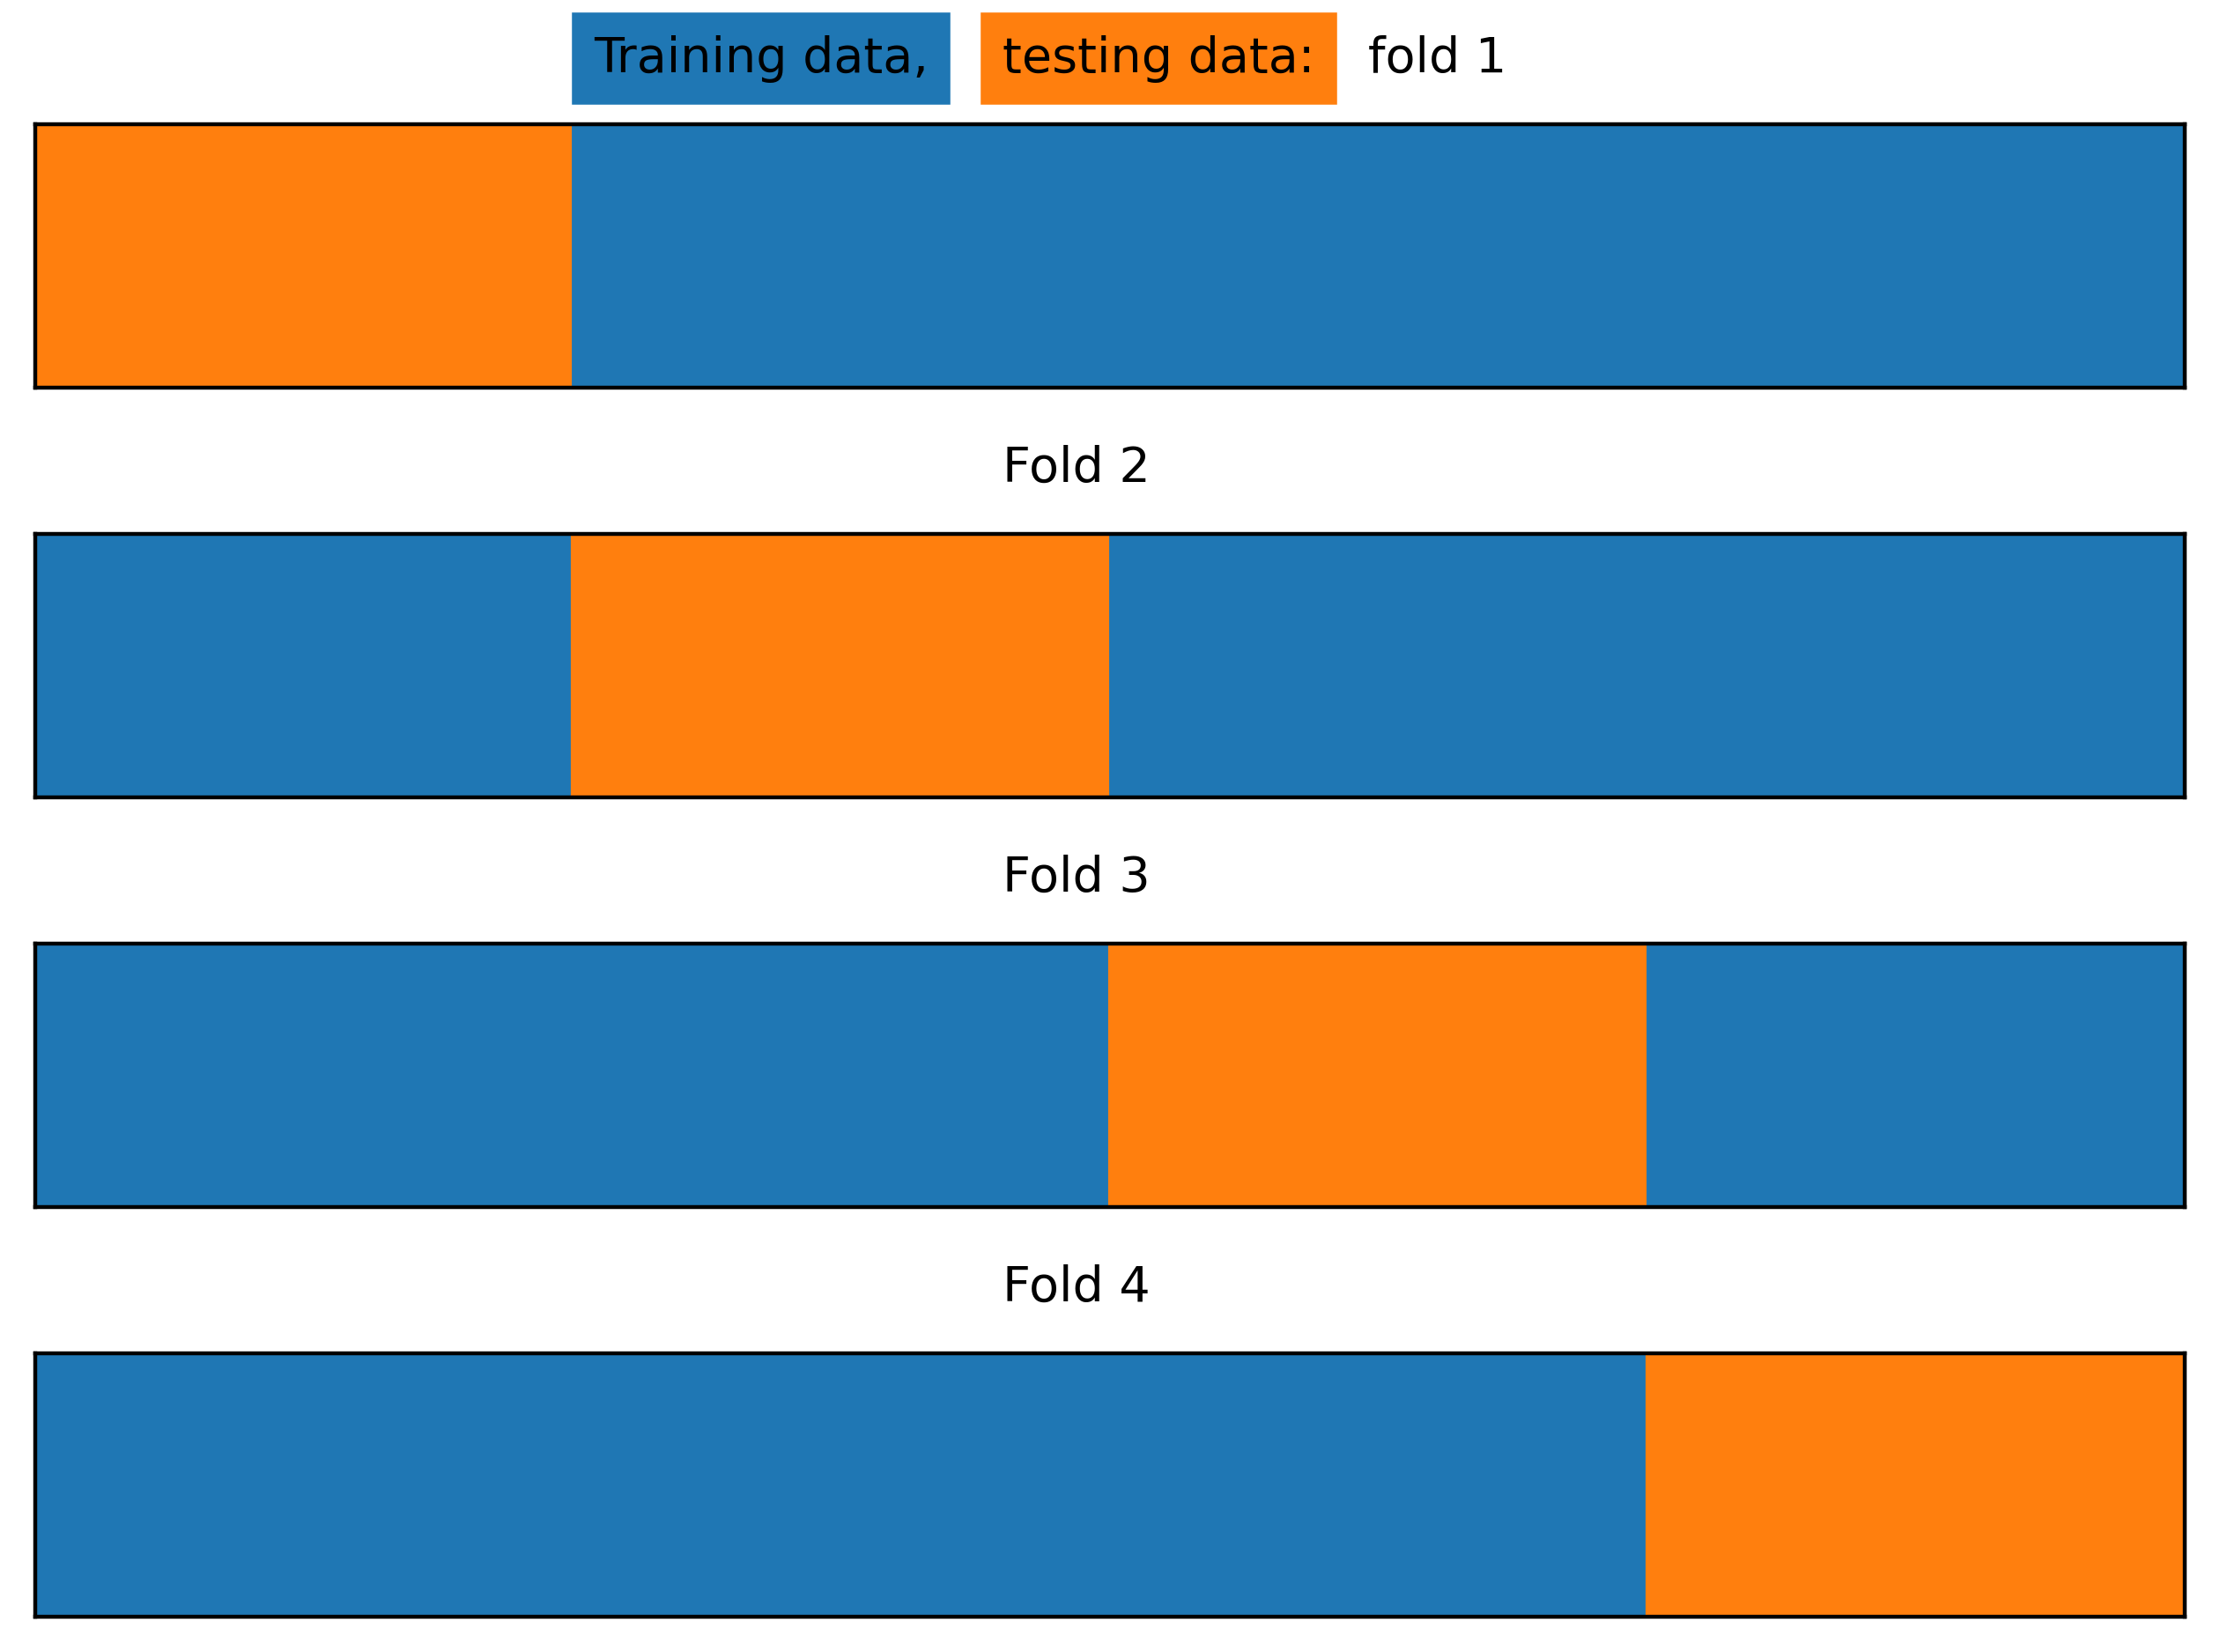

In [35]:
plot_kfolds(k_folds)

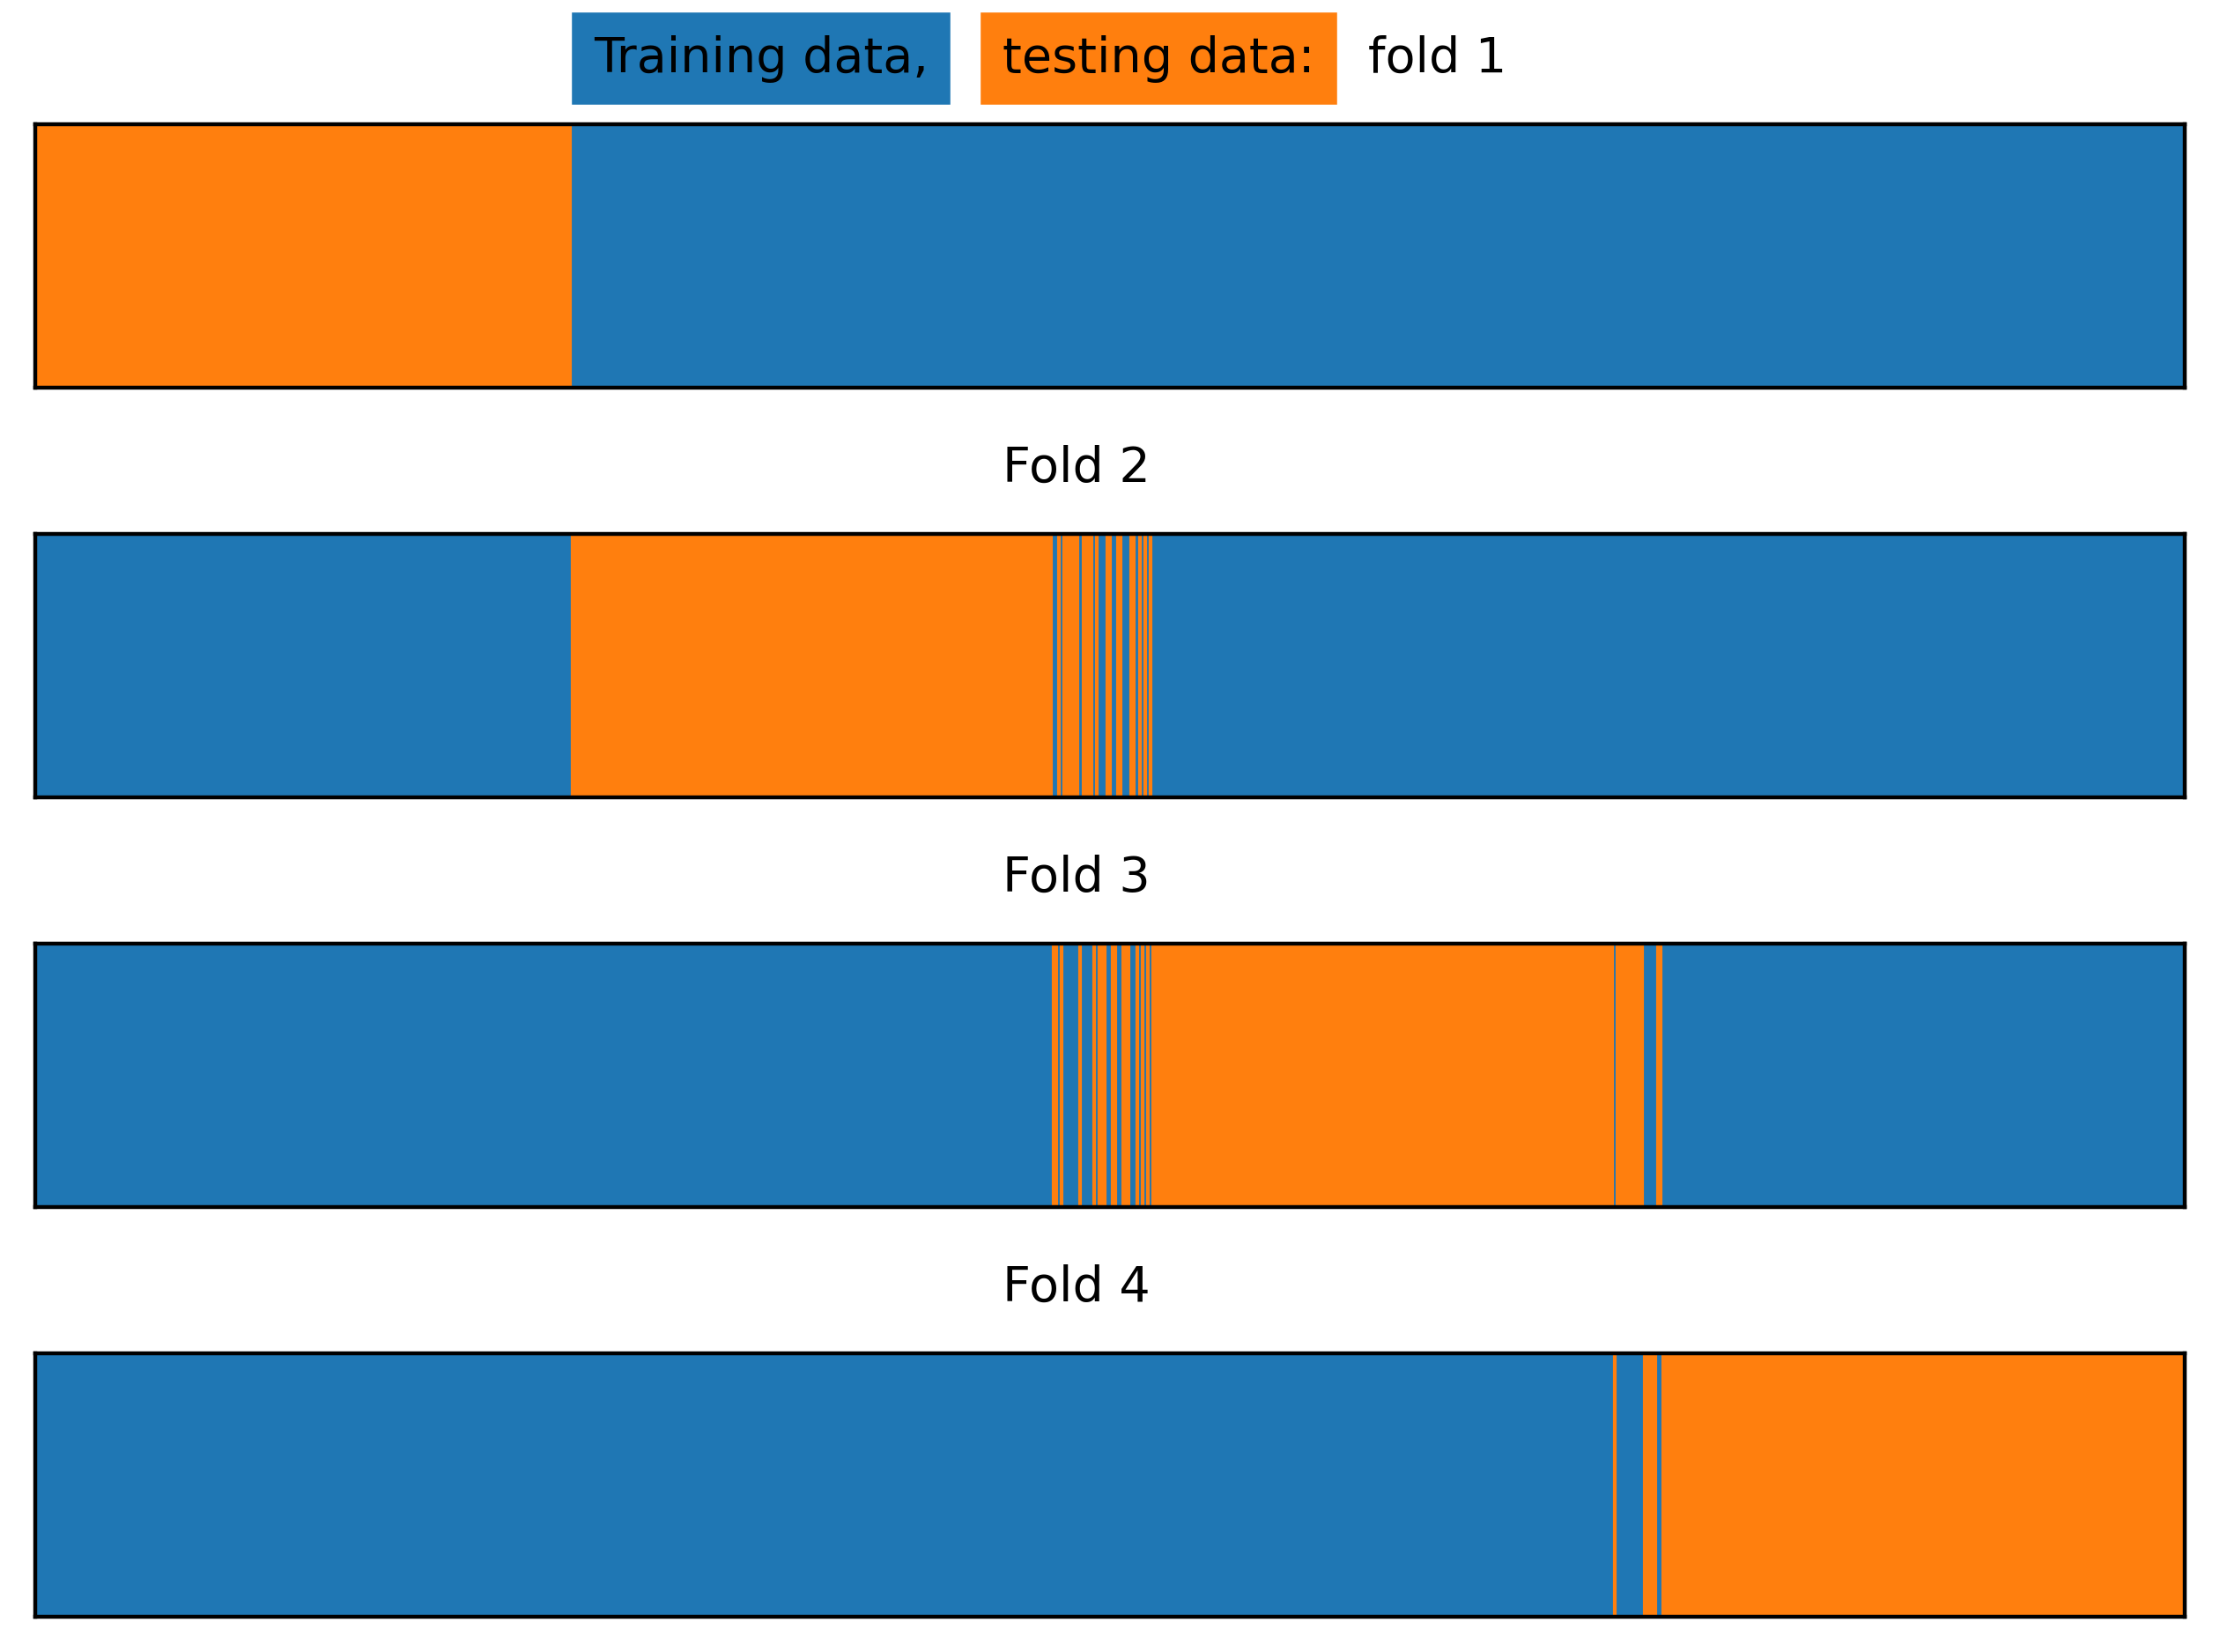

In [36]:
k_folds = StratifiedKFold(n_splits = n_folds, shuffle = False)
plot_kfolds(k_folds)

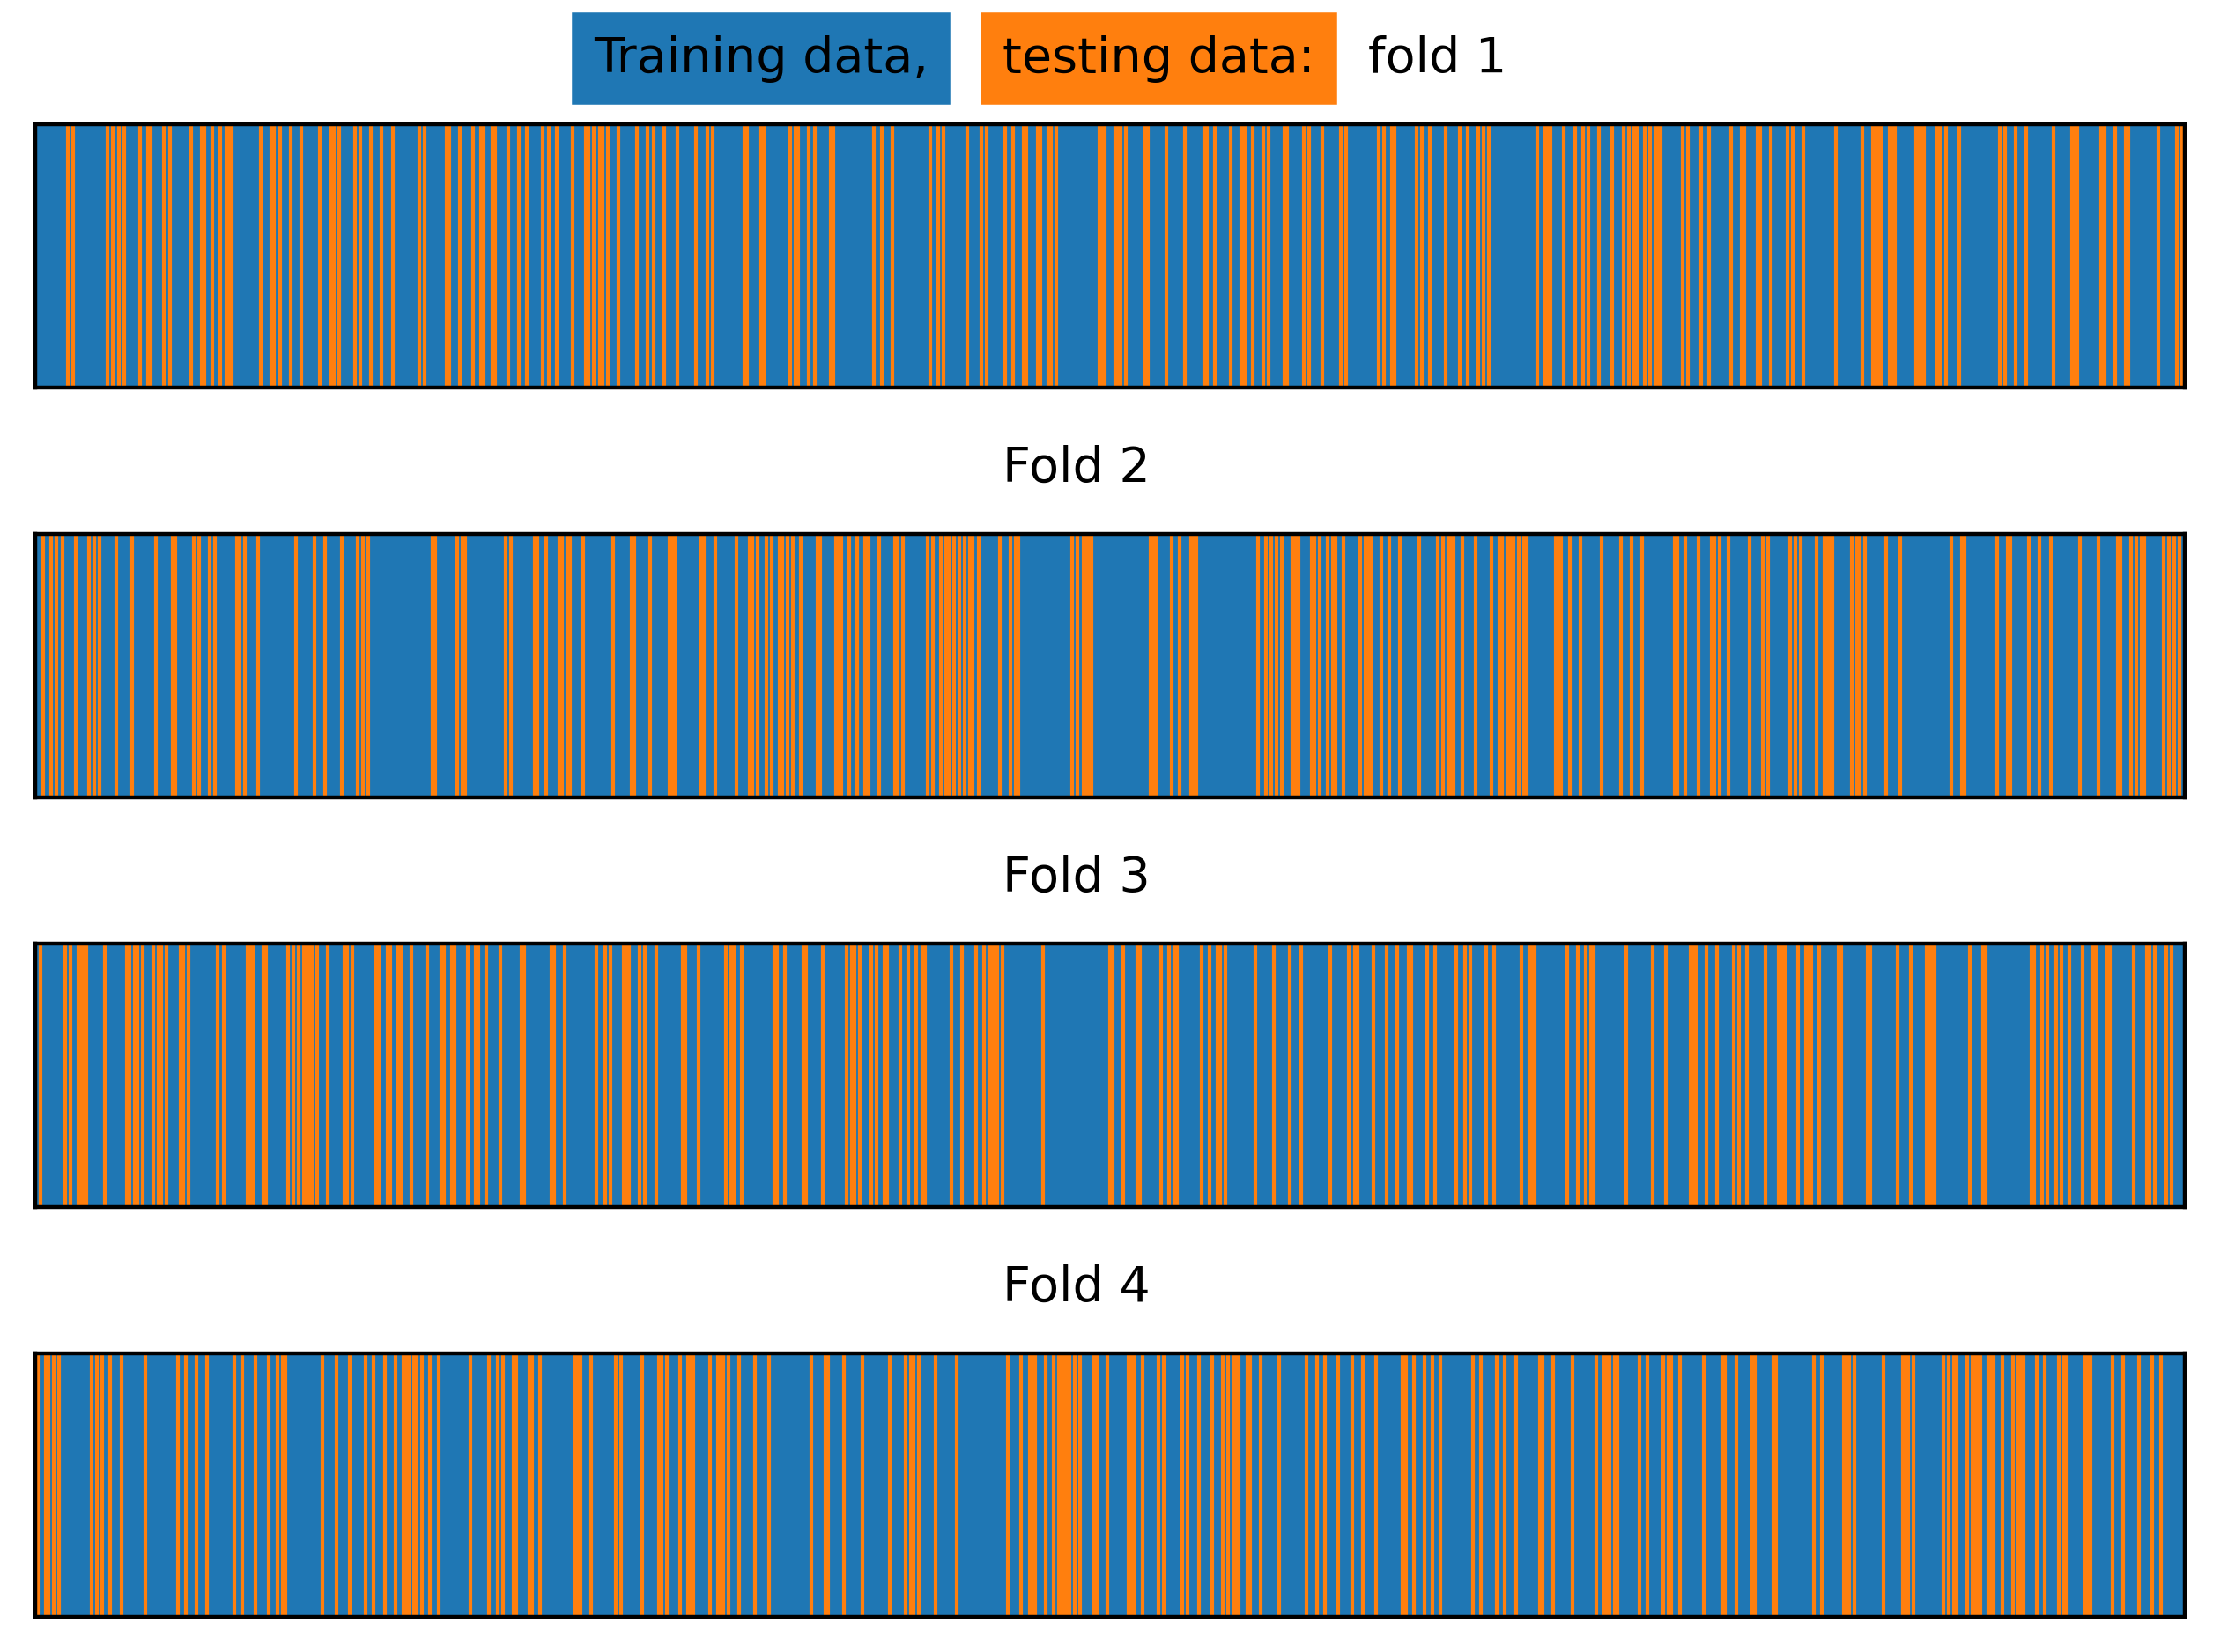

In [37]:
k_folds = StratifiedKFold(n_splits = n_folds, shuffle = True, random_state = 1)
plot_kfolds(k_folds)

#### Reduce Overfitting on the Synthetic Data Classification Problem

In [38]:
C_val_exponents = np.linspace(3,-3,13)
C_val_exponents


array([ 3. ,  2.5,  2. ,  1.5,  1. ,  0.5,  0. , -0.5, -1. , -1.5, -2. ,
       -2.5, -3. ])

In [39]:
C_vals = np.float64(10)** C_val_exponents
C_vals

array([1.00000000e+03, 3.16227766e+02, 1.00000000e+02, 3.16227766e+01,
       1.00000000e+01, 3.16227766e+00, 1.00000000e+00, 3.16227766e-01,
       1.00000000e-01, 3.16227766e-02, 1.00000000e-02, 3.16227766e-03,
       1.00000000e-03])

In [40]:
from sklearn.metrics import roc_curve

In [41]:
def cross_val_C_search(k_folds, C_vals, model, X, Y):
    
    n_folds = k_folds.n_splits
    cv_train_roc_auc = np.empty((n_folds, len(C_vals)))
    cv_test_roc_auc = np.empty((n_folds, len(C_vals)))
    cv_test_roc = [[]]*len(C_vals)

    for c_val_counter in range(len(C_vals)):
        #Set the C value for the model object
        model.C = C_vals[c_val_counter]
        #Count folds for each value of C
        fold_counter = 0
        #Get training and testing indices for each fold
        for train_index, test_index in k_folds.split(X, Y):
            #Subset the features and response, for training and testing data for
            #this fold
            X_cv_train, X_cv_test = X[train_index], X[test_index]
            y_cv_train, y_cv_test = Y[train_index], Y[test_index]

            #Fit the model on the training data
            model.fit(X_cv_train, y_cv_train)

            #Get the training ROC AUC
            y_cv_train_predict_proba = model.predict_proba(X_cv_train)
            cv_train_roc_auc[fold_counter, c_val_counter] = roc_auc_score(y_cv_train, y_cv_train_predict_proba[:,1])

            #Get the test ROC AUC
            y_cv_test_predict_proba = model.predict_proba(X_cv_test)
            cv_test_roc_auc[fold_counter, c_val_counter] = roc_auc_score(y_cv_test, y_cv_test_predict_proba[:,1])

            #Test ROC curves for each fold
            this_fold_roc = roc_curve(y_cv_test, y_cv_test_predict_proba[:,1])
            cv_test_roc[c_val_counter].append(this_fold_roc)

            #Increment the fold counter
            fold_counter += 1

        #Indicate progress
        print('Done with C = {}'.format(lr_syn.C))

    return cv_train_roc_auc, cv_test_roc_auc, cv_test_roc

In [42]:
%%time
cv_train_roc_auc, cv_test_roc_auc, cv_test_roc = cross_val_C_search(k_folds, C_vals, lr_syn, X_syn_train, y_syn_train)

Done with C = 1000.0
Done with C = 316.22776601683796
Done with C = 100.0
Done with C = 31.622776601683793
Done with C = 10.0
Done with C = 3.1622776601683795
Done with C = 1.0
Done with C = 0.31622776601683794
Done with C = 0.1
Done with C = 0.03162277660168379
Done with C = 0.01
Done with C = 0.0031622776601683794
Done with C = 0.001
CPU times: total: 22.4 s
Wall time: 19.5 s


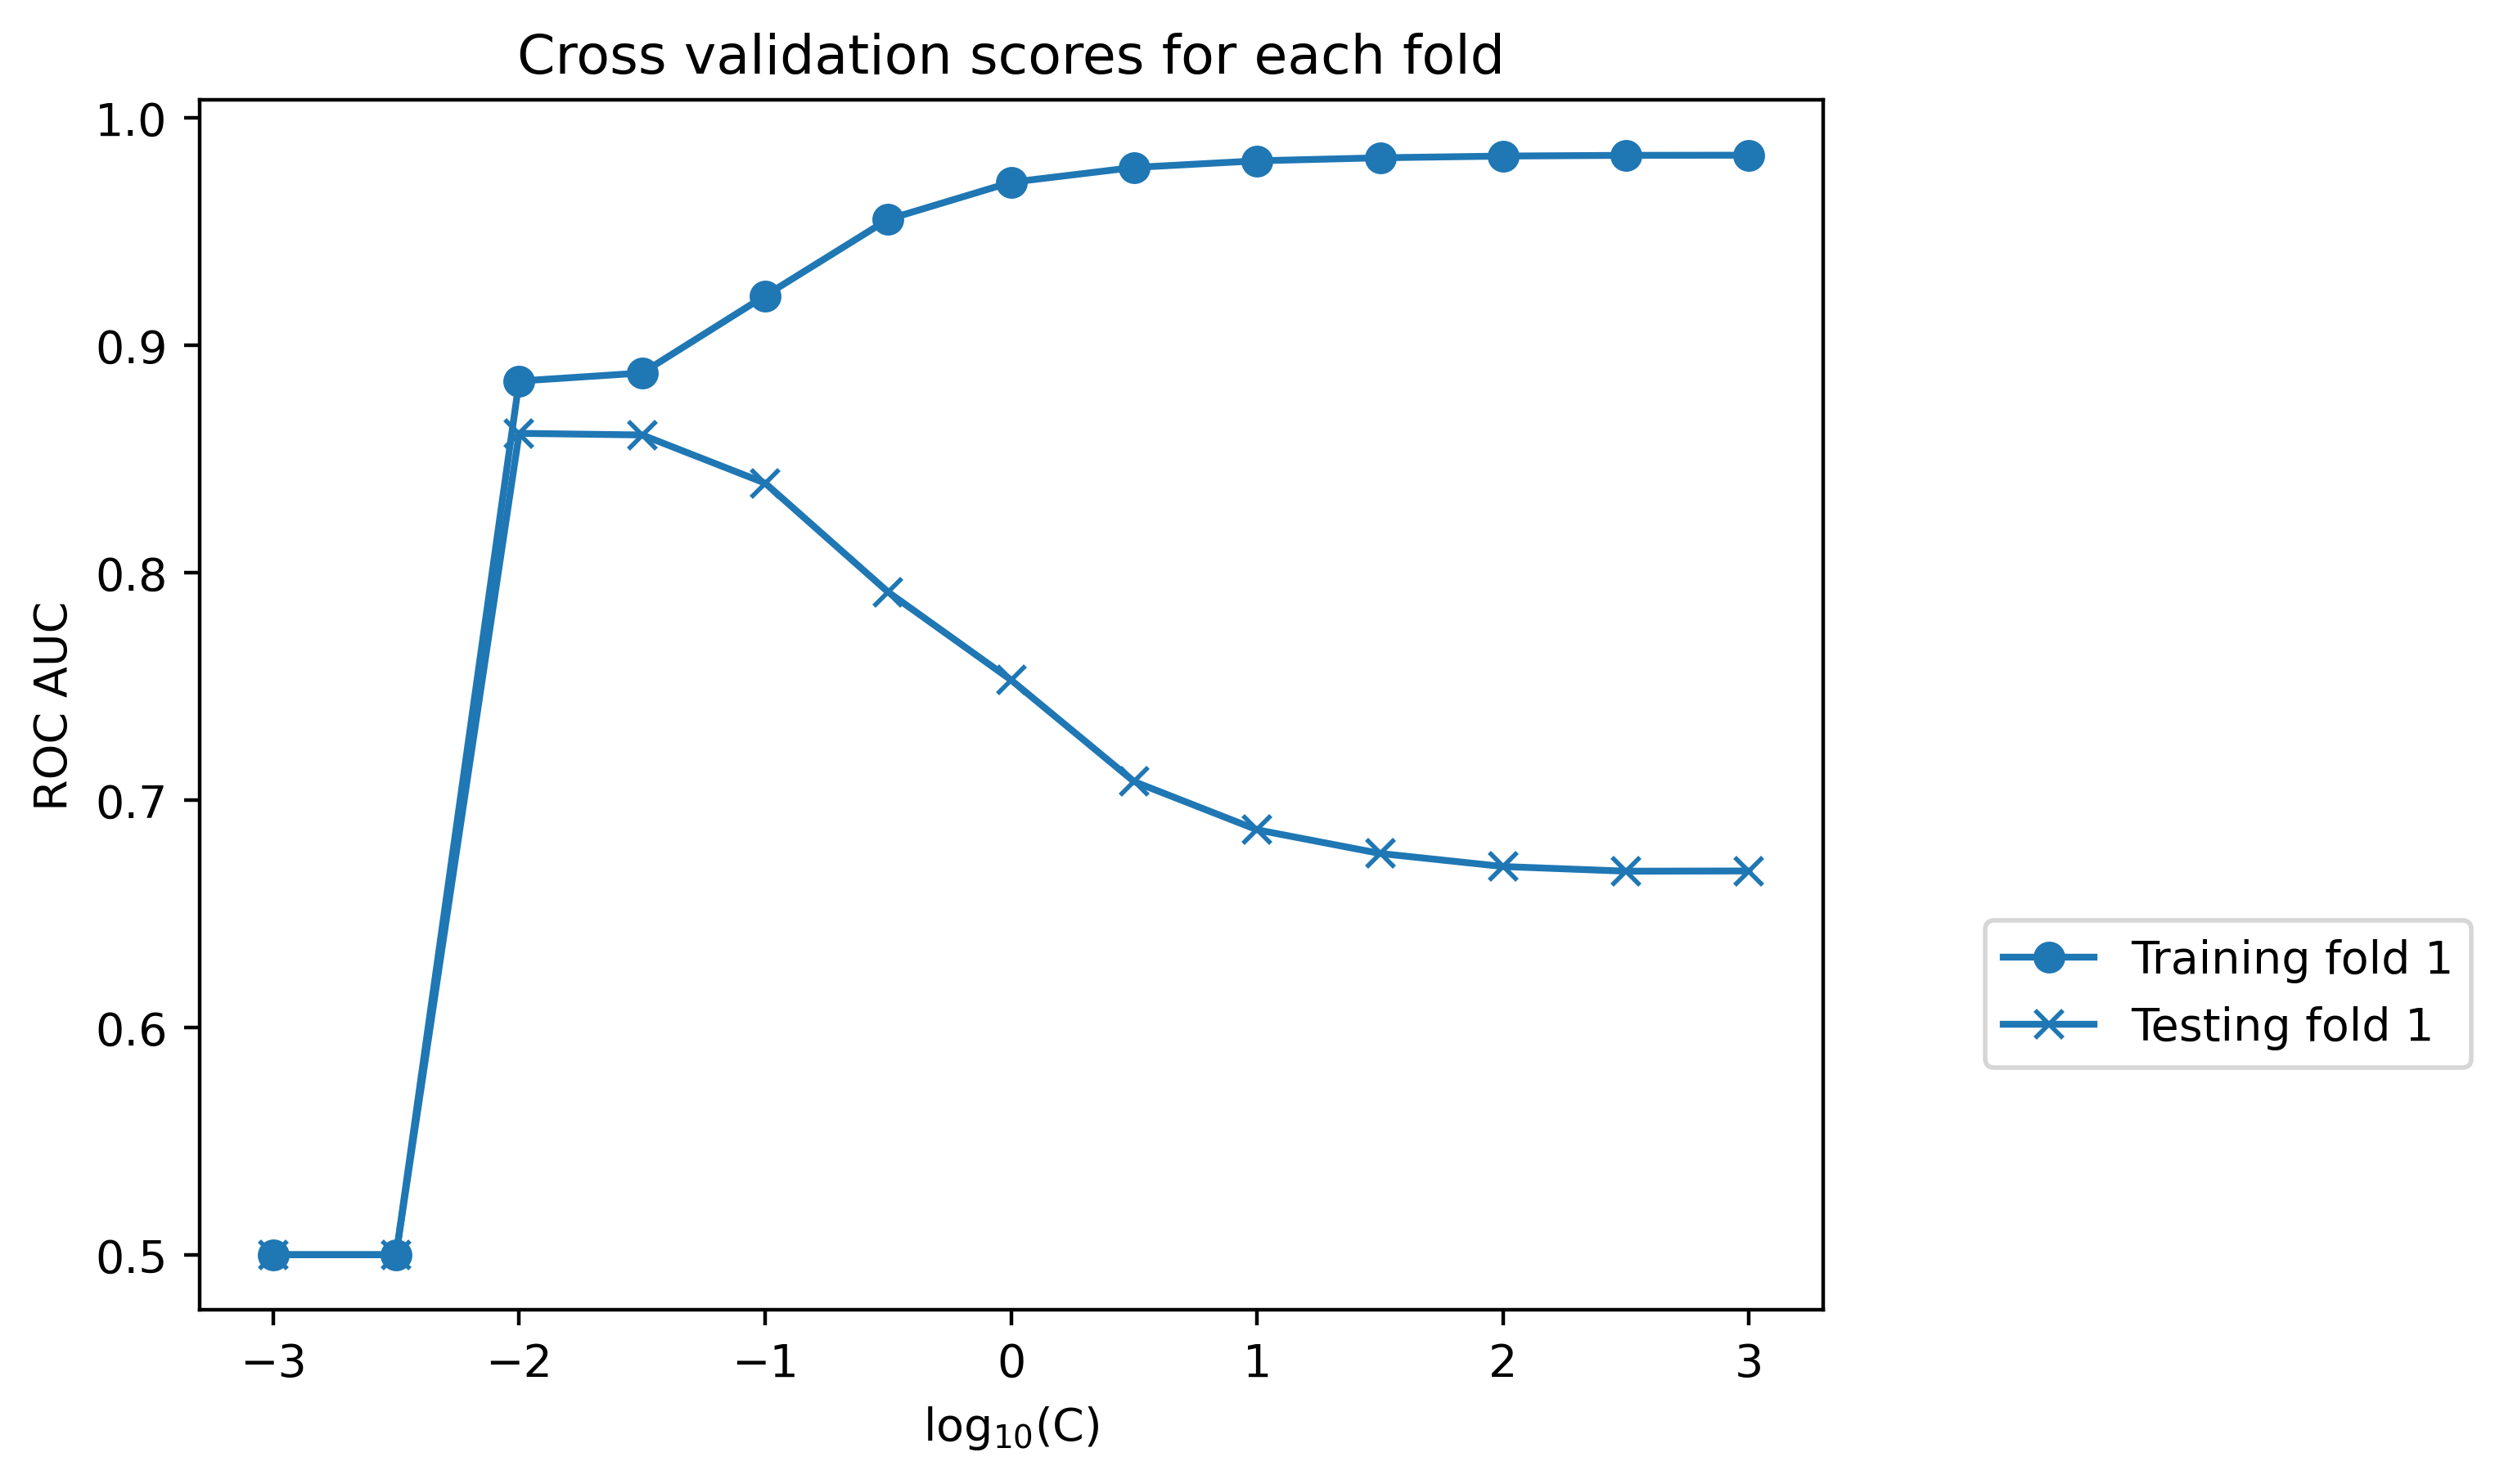

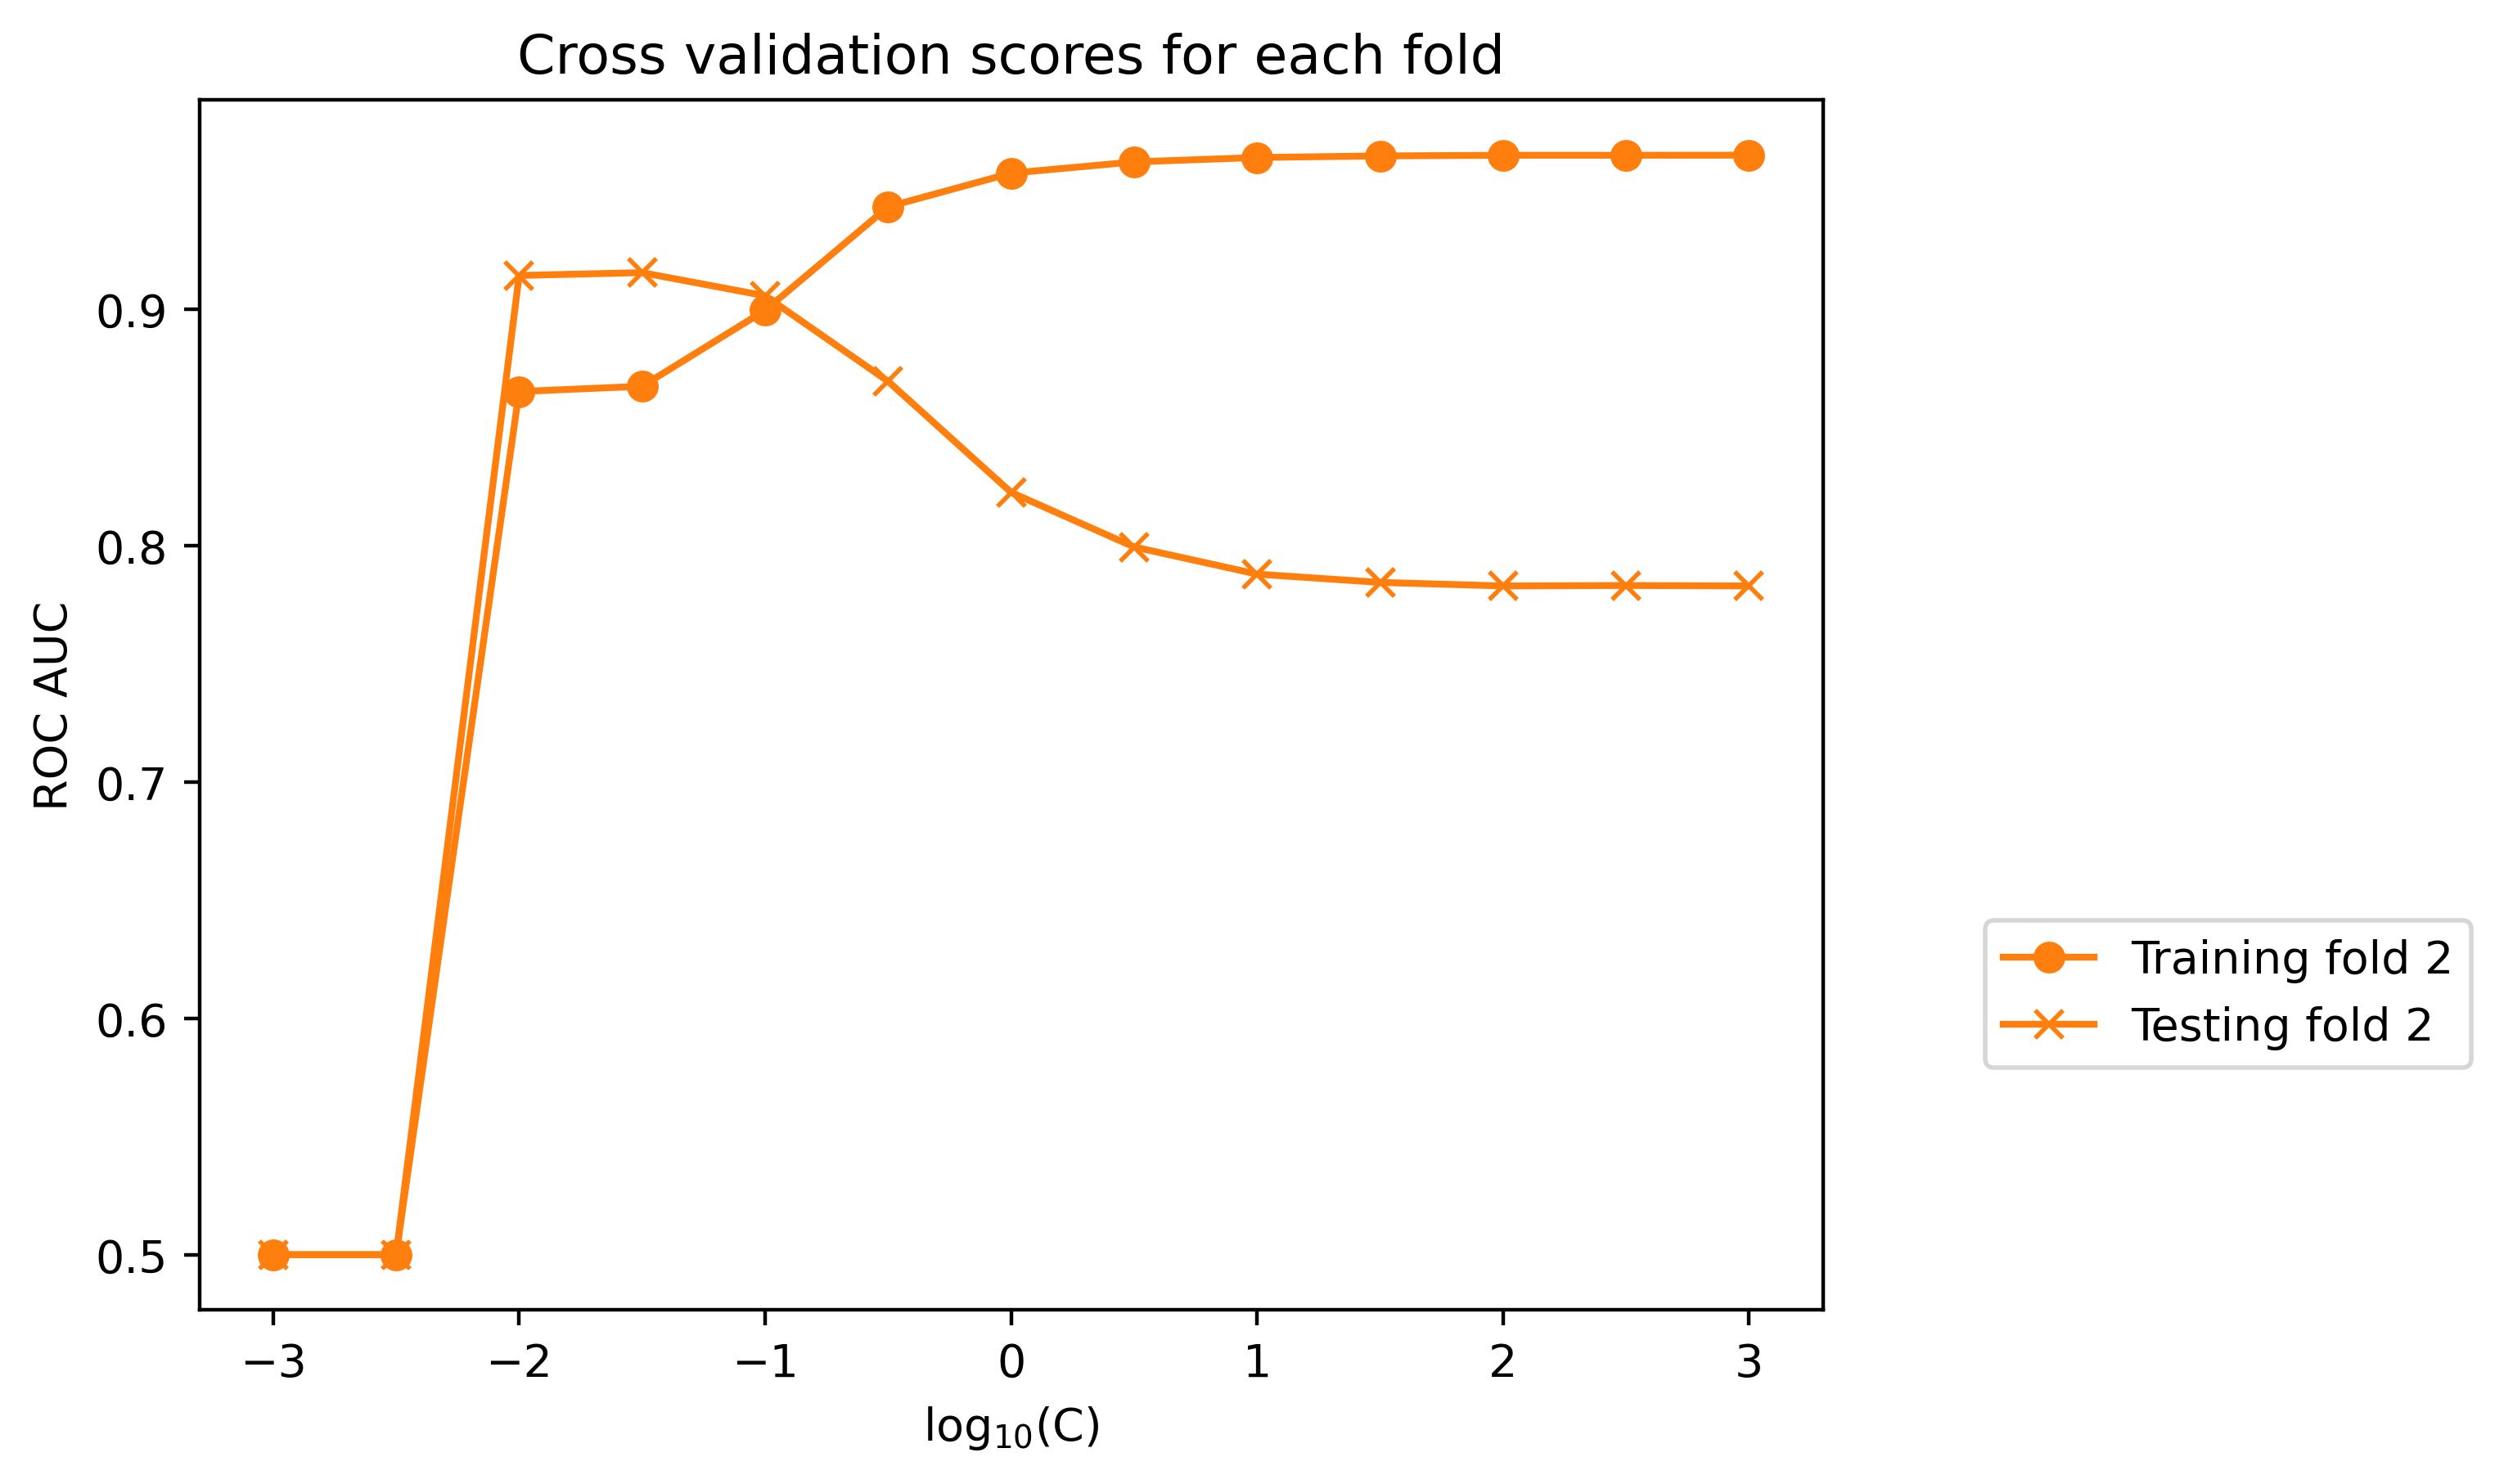

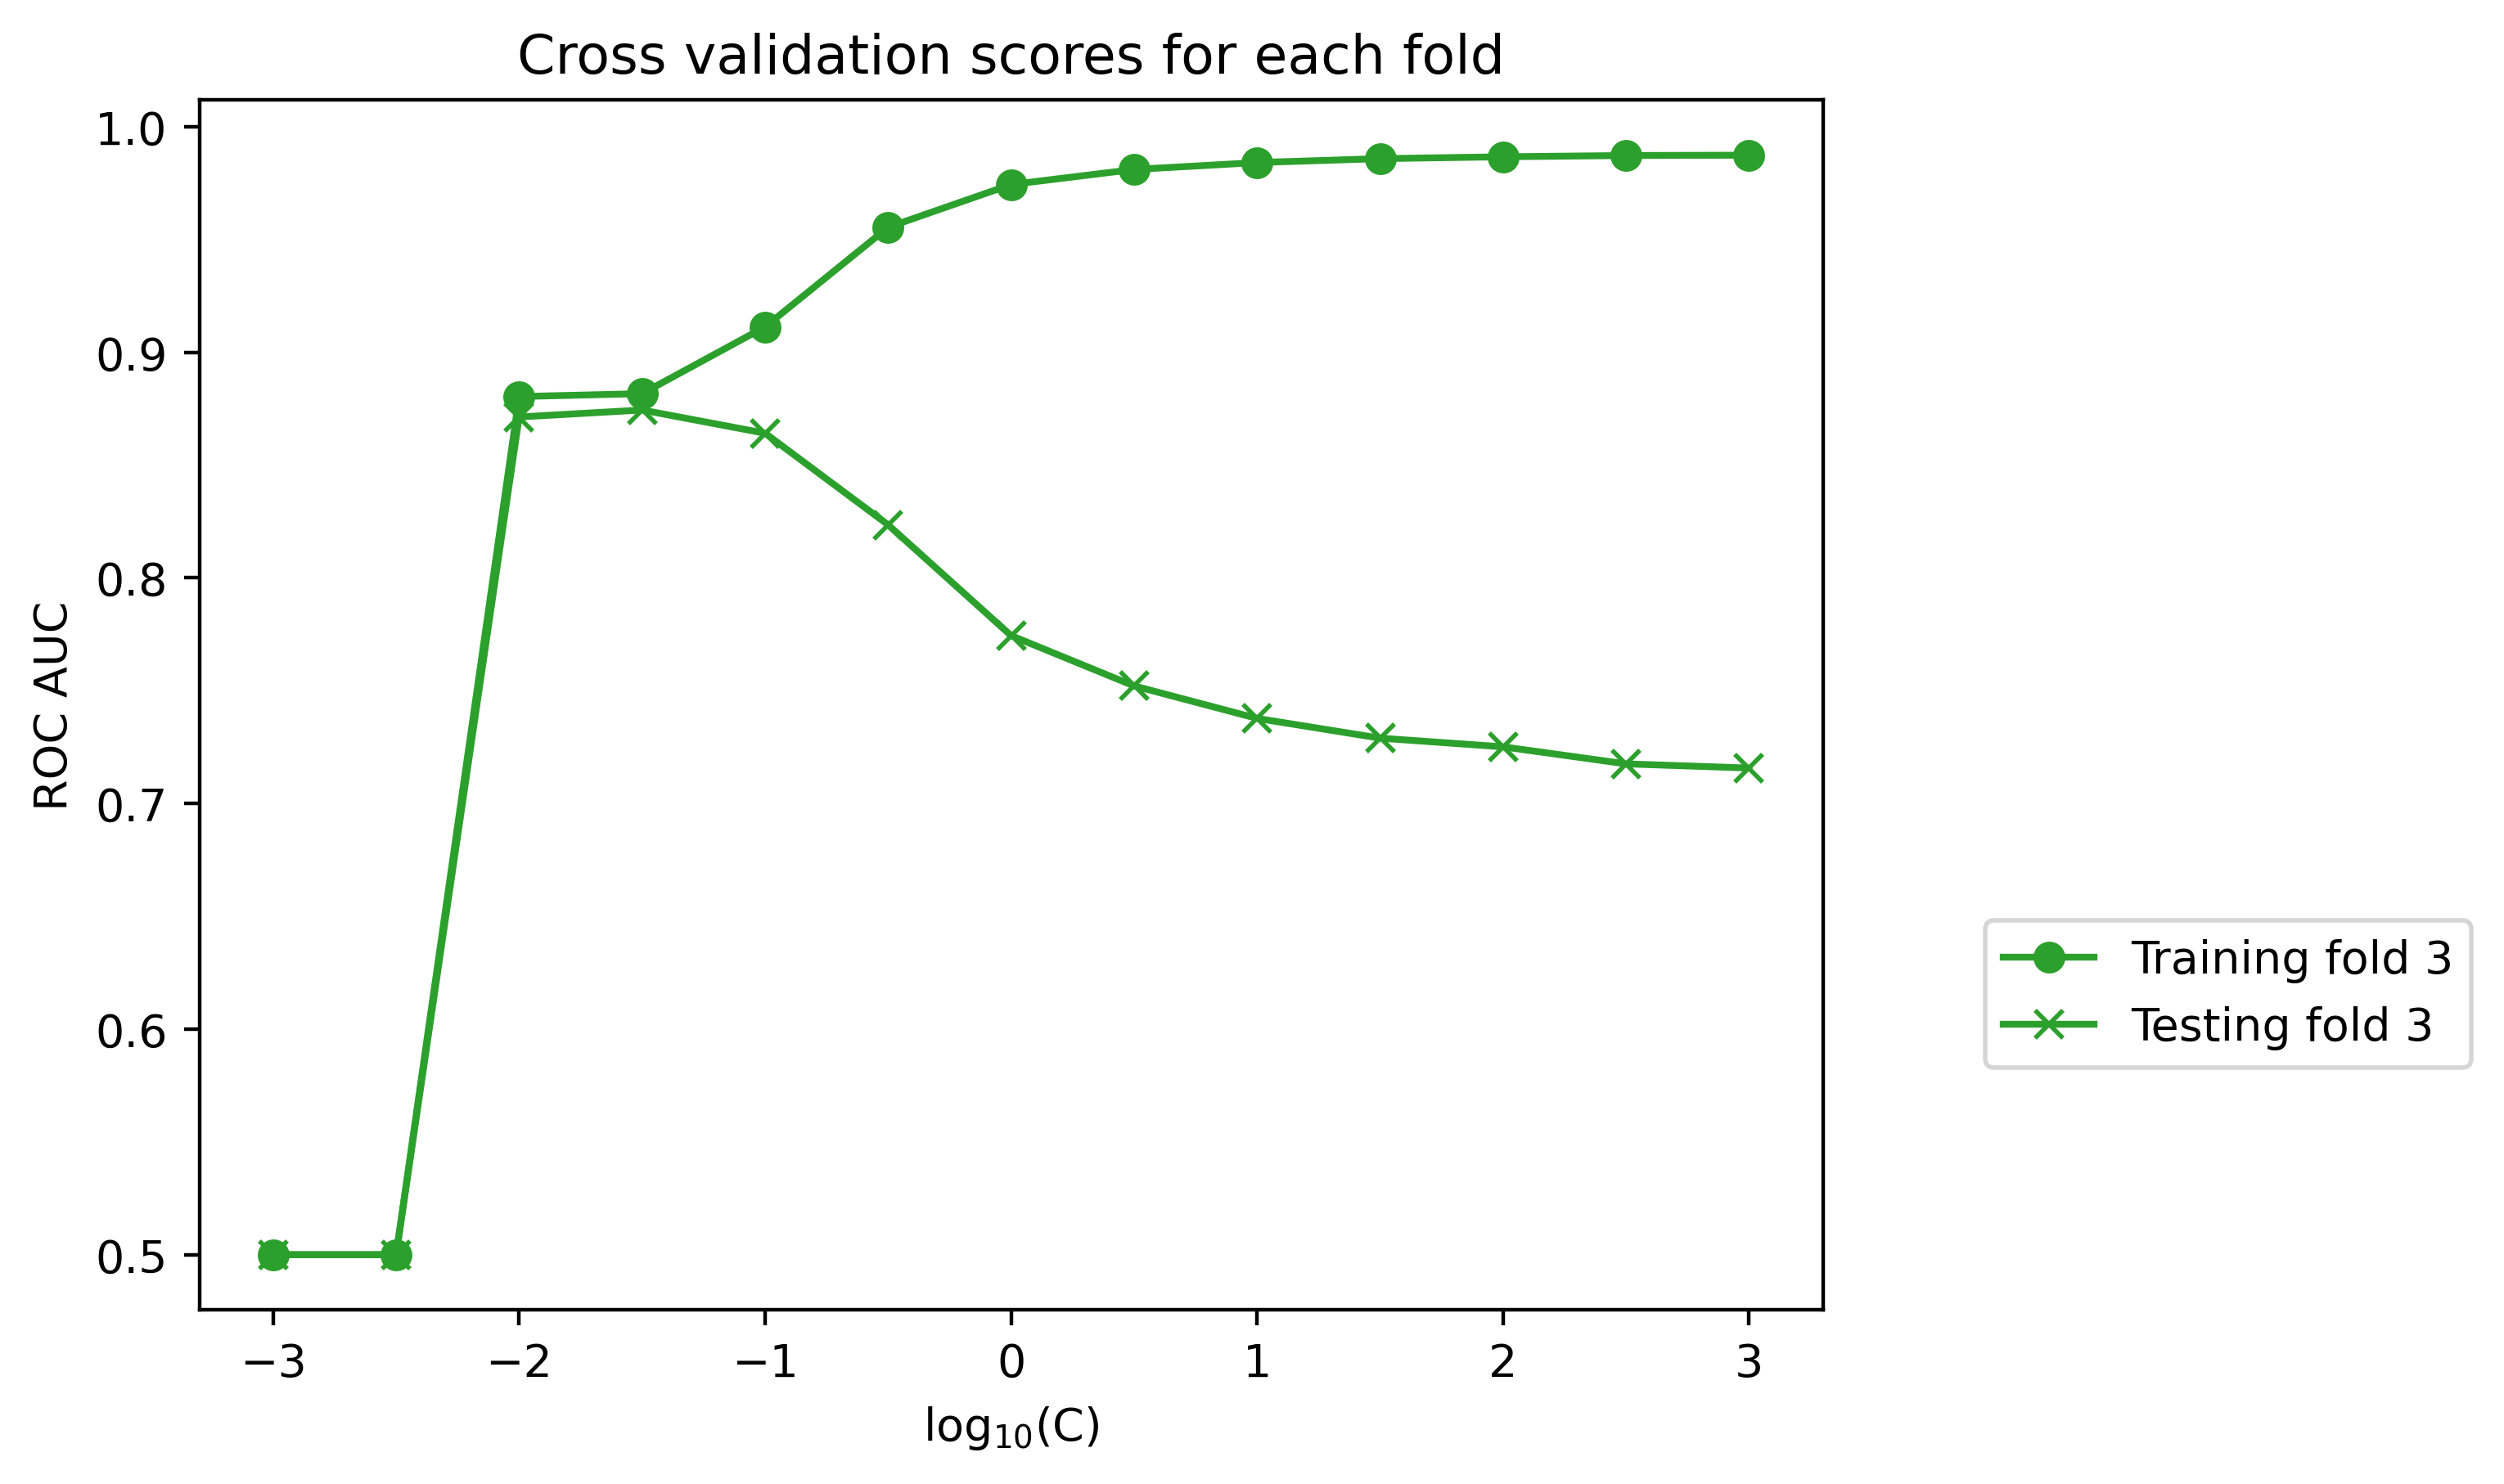

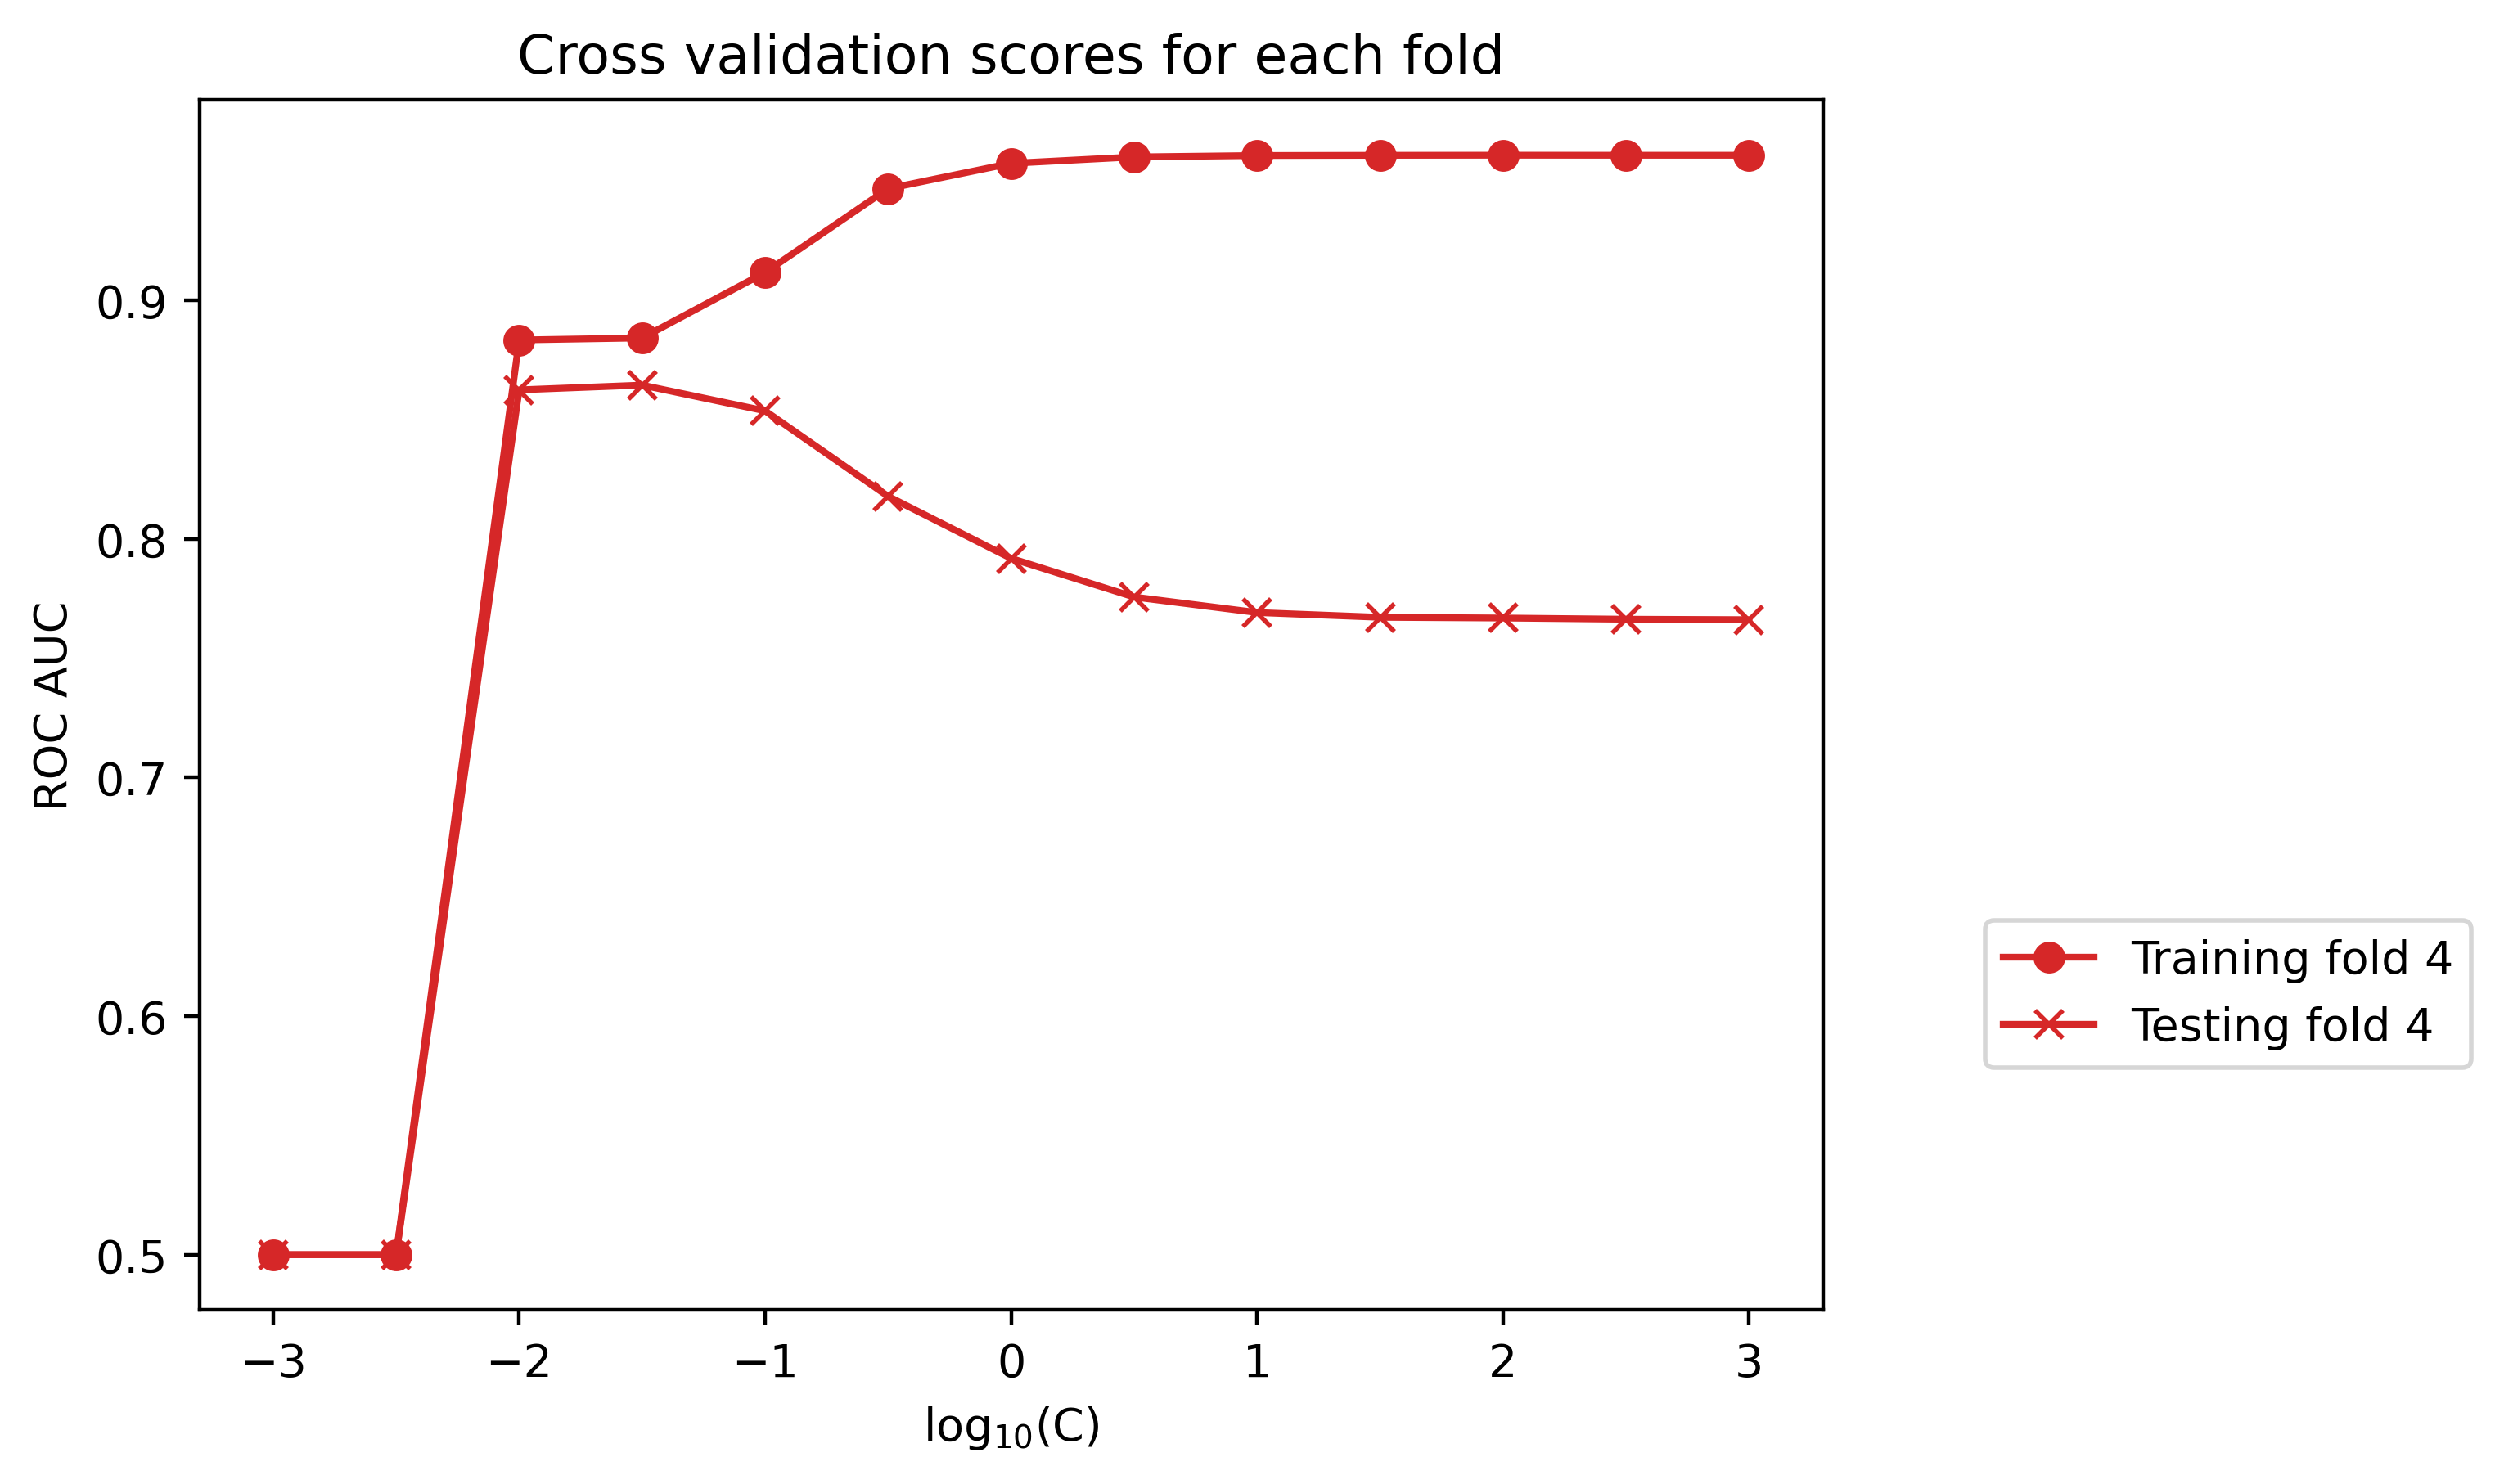

In [43]:
for this_fold in range(k_folds.n_splits):
    plt.plot(C_val_exponents, cv_train_roc_auc[this_fold], '-o', color = cmap(this_fold), label = "Training fold {}".format(this_fold + 1))
    plt.plot(C_val_exponents, cv_test_roc_auc[this_fold], '-x', color = cmap(this_fold), label = "Testing fold {}".format(this_fold + 1))
    plt.ylabel('ROC AUC')
    plt.xlabel('log$_{10}$(C)')
    plt.legend(loc = [1.1, 0.2])
    plt.title('Cross validation scores for each fold')
    plt.show()


In [44]:
plt.plot(C_val_exponents, np.mean(cv_train_roc_auc, axis = 0), '-o', label = 'Average Training Score')
plt.plot(C_val_exponents, np.mean(cv_test_roc_auc, axis = 0), '-x', label = 'Averaging Testing Score')
plt.ylabel('ROC AUC')
plt.xlabel('log$_{10}$(C)')
plt.legend()
plt.title('Cross validation scores averaged over all folds')

Text(0.5, 1.0, 'Cross validation scores averaged over all folds')

In [45]:
best_C_val_bool = C_val_exponents == -1.5
best_C_val_bool.astype(int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [46]:
best_C_val_ix = np.nonzero(best_C_val_bool.astype(int))
print(best_C_val_ix[0][0])

9


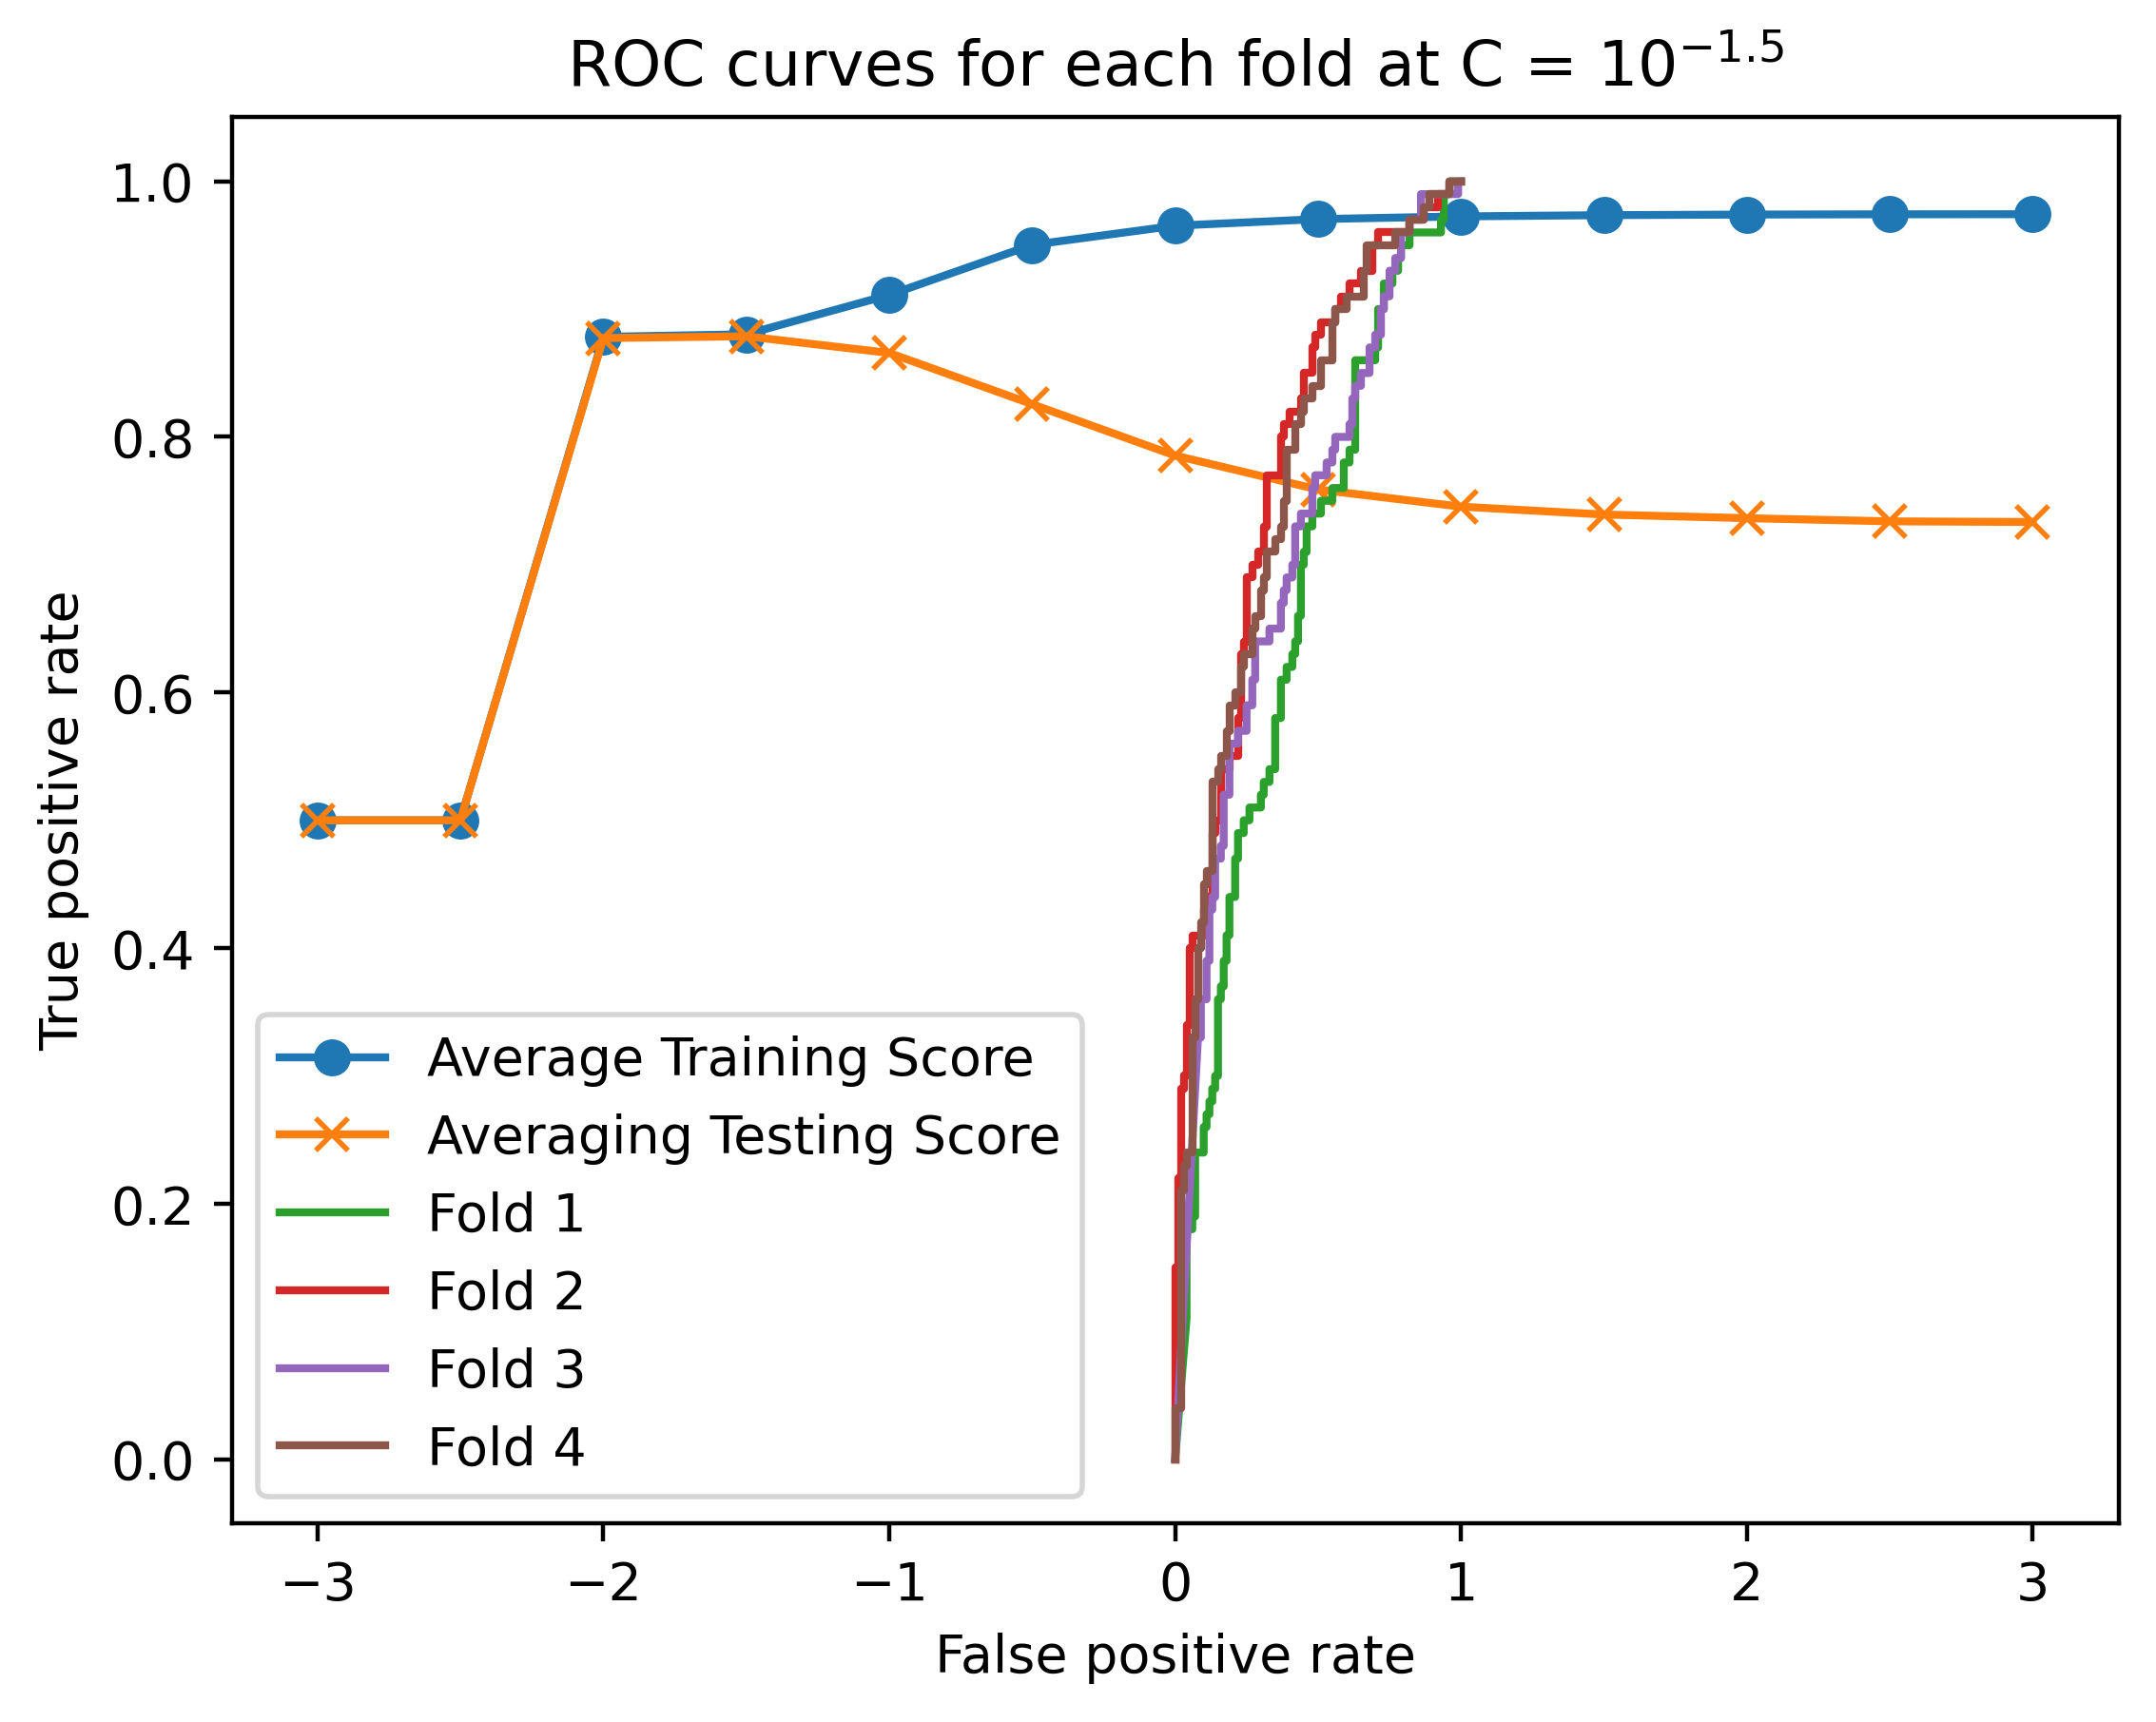

In [47]:
# Access the true and false positive rates in order to plot the ROC curves
# for each fold:

for this_fold in range(k_folds.n_splits):
    fpr = cv_test_roc[best_C_val_ix[0][0]][this_fold][0]
    tpr = cv_test_roc[best_C_val_ix[0][0]][this_fold][1]
    plt.plot(fpr, tpr, label = 'Fold {}'.format(this_fold + 1))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curves for each fold at C = $10^{-1.5}$')
plt.legend()
plt.show()



In [48]:
lr_syn.C = 10**(-1.5)
lr_syn.fit(X_syn_train, y_syn_train)

LogisticRegression(C=0.03162277660168379, penalty='l1', random_state=1,
                   solver='liblinear')

In [49]:
y_syn_train_predict_prob = lr_syn.predict_proba(X_syn_train)
roc_auc_score(y_syn_train, y_syn_train_predict_prob[:,1])

0.8802812499999999

In [50]:
y_syn_test_predict_proba = lr_syn.predict_proba(X_syn_test)
roc_auc_score(y_syn_test, y_syn_test_predict_proba[:,1])

0.8847884788478848

In [51]:
sum((lr_syn.coef_ != 0)[0])

2

In [52]:
lr_syn.intercept_

array([0.])

In [53]:
#Exercise
import pandas as pd
df = pd.read_csv('CaseStudyFile/Chapter_1_cleaned_data.csv')
features_response = df.columns.tolist()
features_response[:5]

['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE']

In [86]:
features_response[-5:]

['PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month']

In [55]:
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
                   'PAY_6', 'EDUCATION_CAT', 'graduate school',
                   'high school', 'none','others', 'university']

features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [56]:
features = features_response[:-1]
features

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [57]:
len(features)

17

In [90]:
X = df[features].values
X.shape

(26664, 17)

#### Make a train_test_split

In [59]:
# The 'default payment next month' represents the test split
X_train, X_test, y_train, y_test = train_test_split(X, df['default payment next month'].values, test_size = 0.2, random_state = 24)

In [60]:
print(X_train.shape)
print(X_test.shape)

(21331, 17)
(5333, 17)


In [61]:
from sklearn.preprocessing import MinMaxScaler
min_max_sc = MinMaxScaler()

In [62]:
lr = LogisticRegression(solver ='saga', penalty = 'l1', max_iter = 1000)
lr

LogisticRegression(max_iter=1000, penalty='l1', solver='saga')

In [63]:
from sklearn.pipeline import Pipeline
scale_lr_pipeline = Pipeline(steps = [('scaler', min_max_sc), ('model', lr)])

In [64]:
scale_lr_pipeline.get_params()

{'memory': None,
 'steps': [('scaler', MinMaxScaler()),
  ('model', LogisticRegression(max_iter=1000, penalty='l1', solver='saga'))],
 'verbose': False,
 'scaler': MinMaxScaler(),
 'model': LogisticRegression(max_iter=1000, penalty='l1', solver='saga'),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'model__C': 1.0,
 'model__class_weight': None,
 'model__dual': False,
 'model__fit_intercept': True,
 'model__intercept_scaling': 1,
 'model__l1_ratio': None,
 'model__max_iter': 1000,
 'model__multi_class': 'deprecated',
 'model__n_jobs': None,
 'model__penalty': 'l1',
 'model__random_state': None,
 'model__solver': 'saga',
 'model__tol': 0.0001,
 'model__verbose': 0,
 'model__warm_start': False}

In [92]:
scale_lr_pipeline.get_params()['model__C']

0.001

In [94]:
scale_lr_pipeline.set_params(model__C = 2)


Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model',
                 LogisticRegression(C=2, max_iter=1000, penalty='l1',
                                    solver='saga'))])

In [67]:
C_val_exponents = np.linspace(2, -3, 6)
C_val_exponents

array([ 2.,  1.,  0., -1., -2., -3.])

In [68]:
C_vals = np.float64(10)**C_val_exponents
C_vals

array([1.e+02, 1.e+01, 1.e+00, 1.e-01, 1.e-02, 1.e-03])

In [69]:
def cross_val_C_search_pipe(k_folds, C_vals, pipeline, X, Y):
    
    n_folds = k_folds.n_splits
    cv_train_roc_auc = np.empty((n_folds, len(C_vals)))
    cv_test_roc_auc = np.empty((n_folds, len(C_vals)))
    cv_test_roc = [[]]*len(C_vals)

    for c_val_counter in range(len(C_vals)):
        #Set the C value for the model object
        pipeline.set_params(model__C = C_vals[c_val_counter])
        #Count folds for each value of C
        fold_counter = 0
        #Get training and testing indices for each fold
        for train_index, test_index in k_folds.split(X, Y):
            #Subset the features and response, for training and testing data for
            #this fold
            X_cv_train, X_cv_test = X[train_index], X[test_index]
            y_cv_train, y_cv_test = Y[train_index], Y[test_index]

            #Fit the model on the training data
            pipeline.fit(X_cv_train, y_cv_train)

            #Get the training ROC AUC
            y_cv_train_predict_proba = pipeline.predict_proba(X_cv_train)
            cv_train_roc_auc[fold_counter, c_val_counter] = \
            roc_auc_score(y_cv_train, y_cv_train_predict_proba[:,1])

            #Get the testing ROC AUC
            y_cv_test_predict_proba = pipeline.predict_proba(X_cv_test)
            cv_test_roc_auc[fold_counter, c_val_counter] = \
            roc_auc_score(y_cv_test, y_cv_test_predict_proba[:,1])

            #Testing ROC curves for each fold
            this_fold_roc = roc_curve(y_cv_test, y_cv_test_predict_proba[:,1])
            cv_test_roc[c_val_counter].append(this_fold_roc)

            #Increment the fold counter
            fold_counter += 1

        #Indicate progress
        print('Done with C = {}'.format(pipeline.get_params()['model__C']))

    return cv_train_roc_auc, cv_test_roc_auc, cv_test_roc

In [70]:
%%time
cv_train_roc_auc, cv_test_roc_auc, cv_test_roc = cross_val_C_search_pipe(k_folds, C_vals, scale_lr_pipeline, X_train, y_train)

Done with C = 100.0
Done with C = 10.0
Done with C = 1.0
Done with C = 0.1
Done with C = 0.01
Done with C = 0.001
CPU times: total: 20.5 s
Wall time: 18.2 s


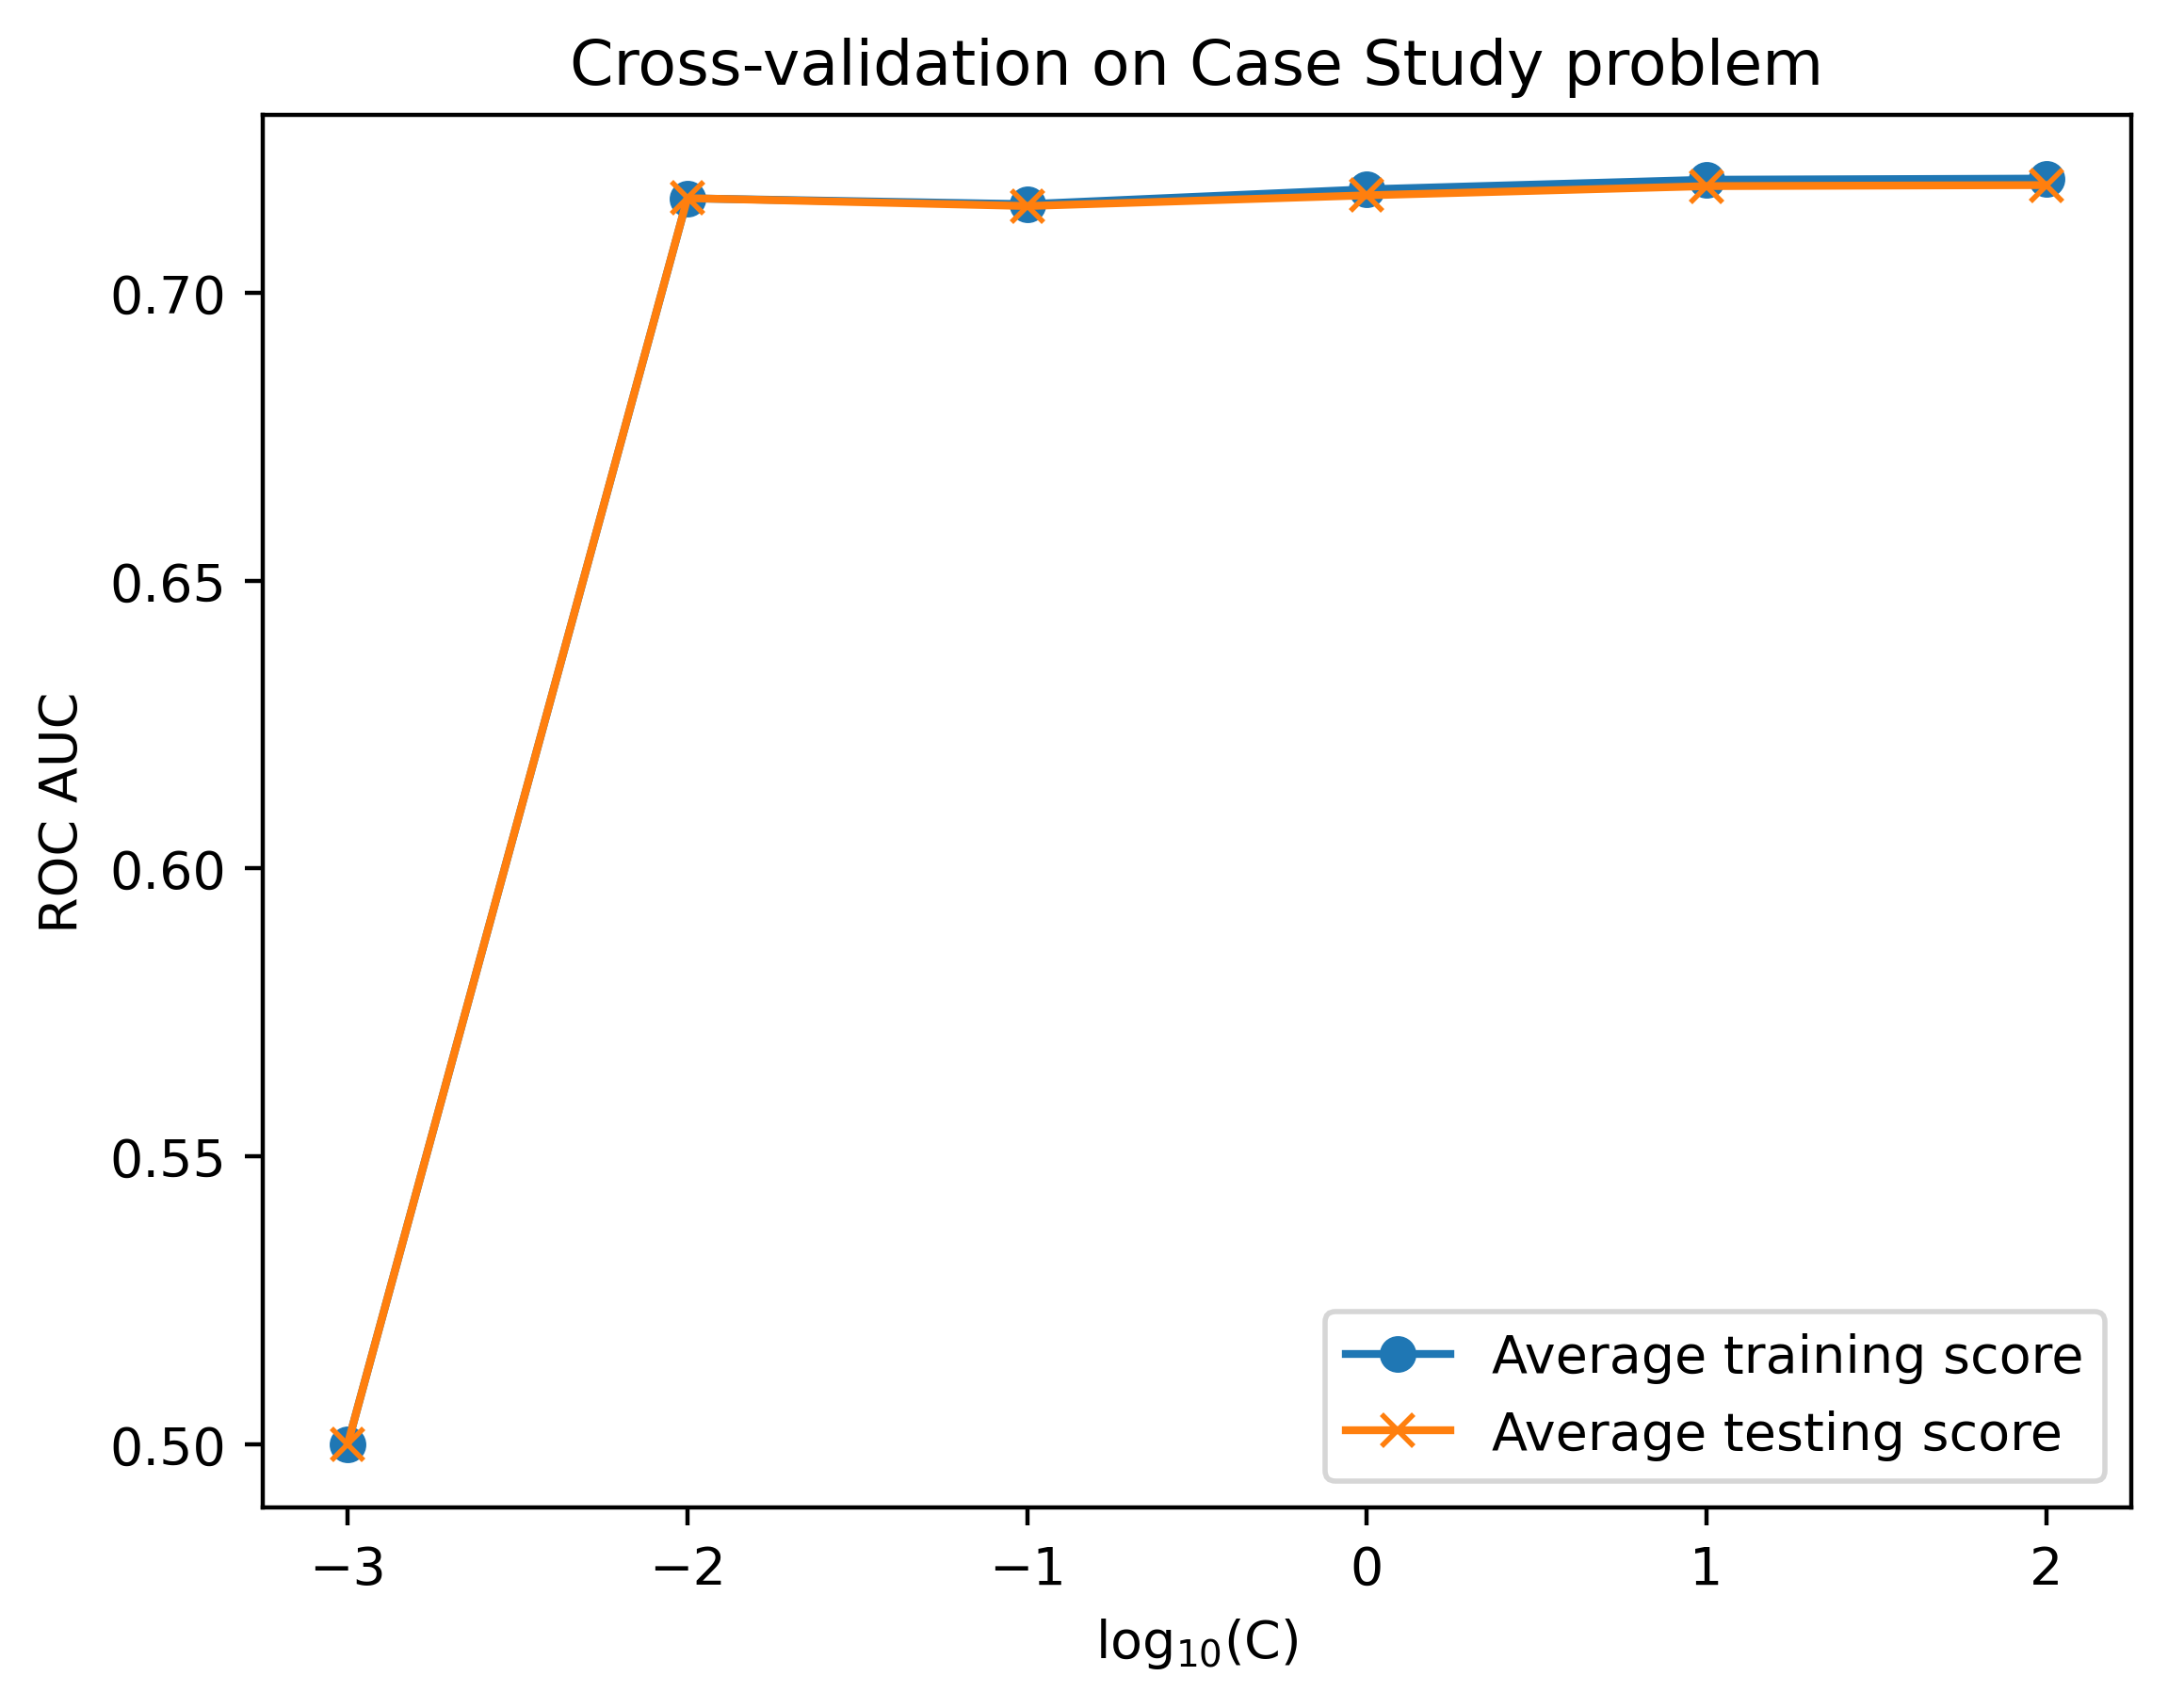

In [71]:
plt.plot(C_val_exponents, np.mean(cv_train_roc_auc, axis = 0),
         '-o', label = 'Average training score')
plt.plot(C_val_exponents, np.mean(cv_test_roc_auc, axis = 0),
         '-x', label = 'Average testing score')
plt.ylabel('ROC AUC')
plt.xlabel('log$_{10}$(C)')
plt.legend()
plt.title('Cross-validation on Case Study problem')
plt.show()

In [72]:
np.mean(cv_test_roc_auc, axis = 0)

array([0.71874816, 0.71857054, 0.7169685 , 0.71511128, 0.7164791 ,
       0.5       ])

In [73]:
from sklearn.preprocessing import PolynomialFeatures

#Creating Interactions
make_interactions = PolynomialFeatures(degree = 2, interaction_only = True, include_bias = False)

In [74]:
X_interact = make_interactions.fit_transform(X)
X_interact.shape

(26664, 153)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(
    X_interact, df['default payment next month'].values,
    test_size = 0.2, random_state =24)

In [76]:
print(X_train.shape)
print(X_test.shape)

(21331, 153)
(5333, 153)


In [77]:
%%time
cv_train_roc_auc, cv_test_roc_auc, cv_test_roc = cross_val_C_search_pipe(k_folds, C_vals, scale_lr_pipeline, X_train, y_train)

c:\Users\HI\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\HI\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\HI\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\HI\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Done with C = 100.0


c:\Users\HI\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\HI\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\HI\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\HI\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Done with C = 10.0


c:\Users\HI\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\HI\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\HI\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Done with C = 1.0
Done with C = 0.1
Done with C = 0.01
Done with C = 0.001
CPU times: total: 9min 50s
Wall time: 10min 7s


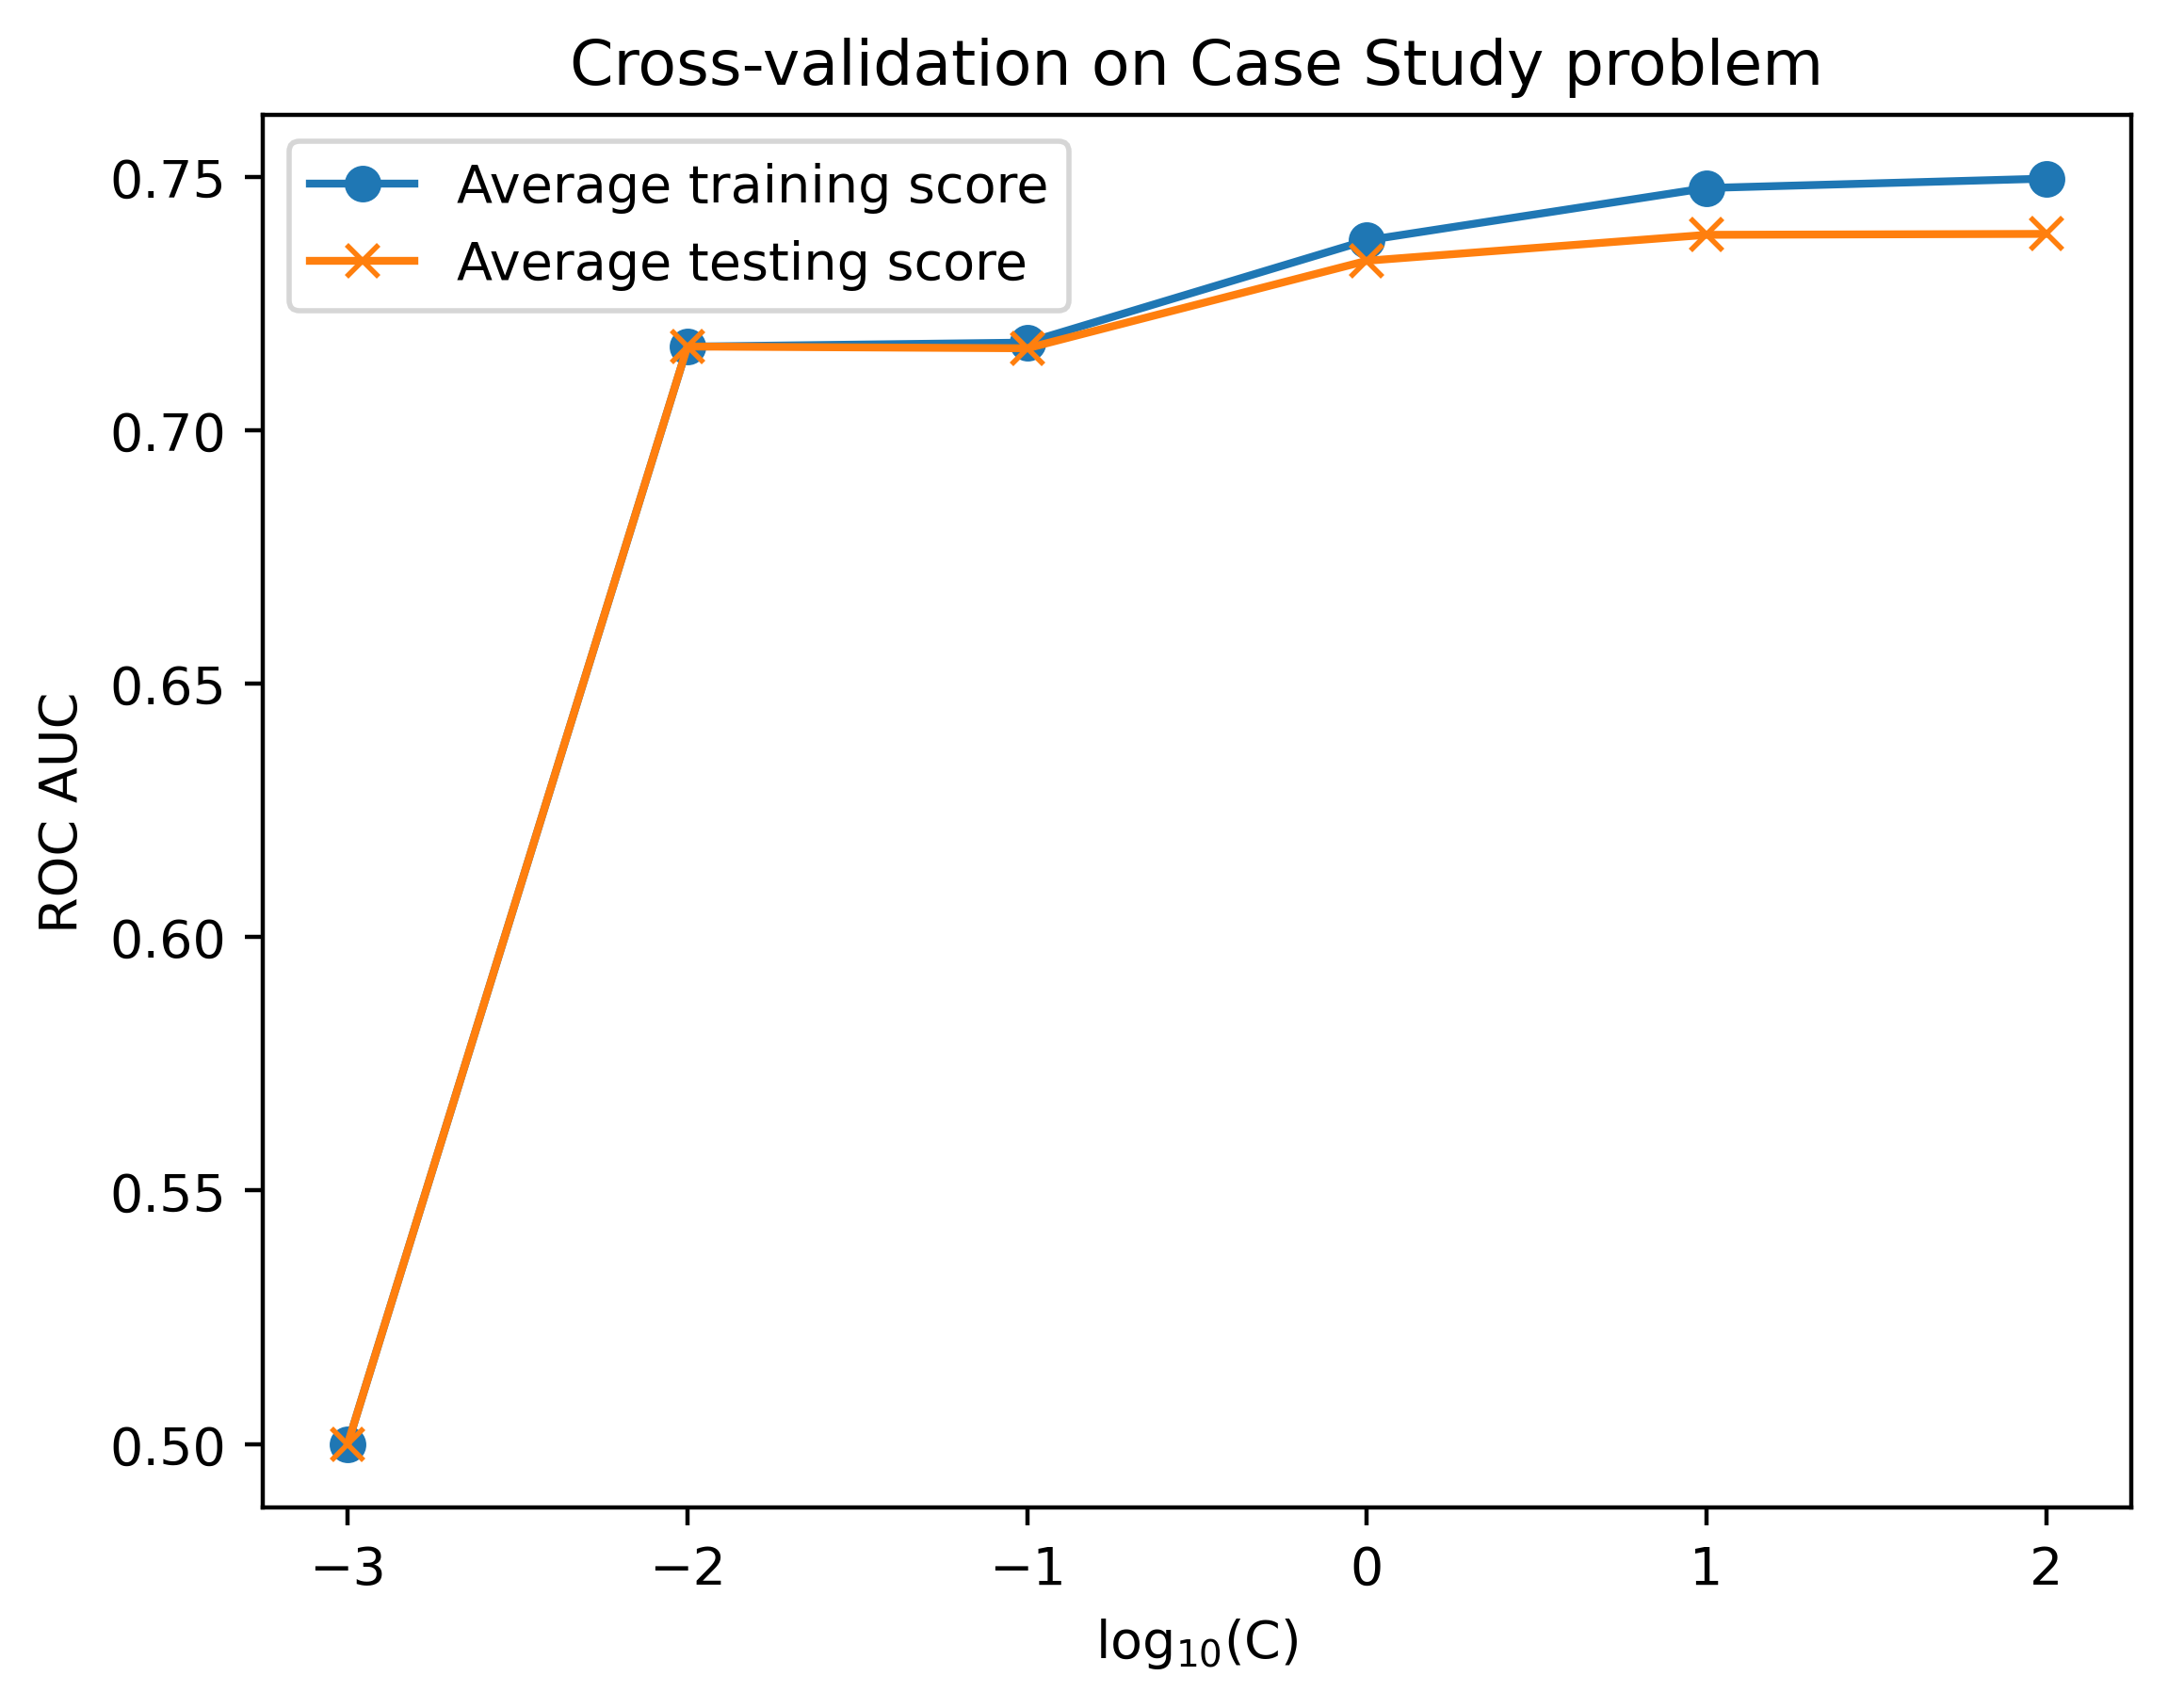

In [78]:
plt.plot(C_val_exponents, np.mean(cv_train_roc_auc,
        axis = 0), '-o', label='Average training score')
plt.plot(C_val_exponents, np.mean(cv_test_roc_auc, 
        axis = 0), '-x', label='Average testing score')
plt.ylabel('ROC AUC')
plt.xlabel('log$_{10}$(C)')
plt.legend()
plt.title('Cross-validation on Case Study problem')
plt.show()

In [79]:
np.mean(cv_test_roc_auc, axis = 0)

array([0.73869198, 0.73850757, 0.73339404, 0.71612838, 0.7164791 ,
       0.5       ])